In [4]:
import os;
import pickle; 
if os.path.isfile('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves_HCT116.pickle'):
    StandardCurve_File = open('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves_HCT116.pickle','rb');
    All_Dicts = pickle.load(StandardCurve_File);
    Num_to_Curve_Dict = All_Dicts[0];
    Num_to_Name_Dict = All_Dicts[1]; 
else: 
    Num_to_Curve_Dict = dict();
    Num_to_Name_Dict = dict();

In [44]:
Pickle_Path = '/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/HCT116';
#File_Path = Pickle_Path+'20200619 A-549 P2 IV_V Pathogen #09-11.pickle';
print(os.listdir(Pickle_Path))
PSD = dict(); 
PSD['201029_142943'] = [1,2,3]; 
PSD['201029_143721'] = [4,5,6]; 
PSD['201029_144427'] = [7,8,9]; 
PSD['201029_145205'] = [10,14,15]; 
PSD['201105_150523'] = [16,17,18]; 
PSD['201105_151230'] = [19,20,21]; 

PSD['201105_151936'] = [22,23,30]; 
PSD['201106_161233'] = [11,12,13];  # this might be 11,12,13  
PSD['201106_155719'] = [24,25,26]; 
PSD['201106_160458'] = [27,28,29]; 


#File_Path = Pickle_Path+'20200703 A-549 P1 IV_V Pathogen #18-20.pickle';

['201029_142943_Plate 1_HCT116.pickle', '201029_143721_Plate 1_HCT116.pickle', '201029_144427_Plate 1_HCT116.pickle', '201029_145205_Plate 1_HCT116.pickle', '201105_150523_Plate 1_HCT116.pickle', '201105_151230_Plate 1_HCT116.pickle', '201105_151936_Plate 1_HCT116.pickle', '201106_155719_Plate 1_HCT116.pickle', '201106_160458_Plate 1_HCT116.pickle', '201106_161233_Plate 1_HCT116.pickle', '210112_170449_Plate 1_HCT116.pickle', '210112_171358_Plate 1_HCT116.pickle', '210112_172306_Plate 1_HCT116.pickle', '210112_173213_Plate 1_HCT116.pickle']


In [45]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import itertools



In [46]:
kernel_names = ['hHCT116','uhHCT116','bp'];
list_of_colors = ['g','r','b']

In [48]:
for filename in os.listdir(Pickle_Path):
    if '_HCT116.pickle' in filename: 
        output_file = open(Pickle_Path+'/'+filename,'rb'); 
        feature_dict = pickle.load(output_file);
        #print(feature_dict)
        all_row_ind = ['A','B','C','D','E','F','G','H']
        all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']

        plt.figure(figsize=(24,16))
        for row_ind in range(0,len(all_row_ind)):
            for col_ind in range(0,len(all_col_ind)):
                this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
                time_keys = list(feature_dict[this_well].keys());
                time_keys.sort()
                for kernel_ind in [0,2]:
                    kernel =  kernel_names[kernel_ind];
                    if kernel_ind==2:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = [np.max([elem-ys[0],0])/(np.max(ys)-ys[0]) for elem in ys]
                    if kernel_ind==0:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                    if kernel_ind ==1:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                    times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
                    subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white',)
                    
                    ys = savgol_filter(ys, 7, 5) # window size 51, polynomial order 3
                    subax.plot(times,ys,'.--',ms=8,color=list_of_colors[kernel_ind])
                    #subax.xlabel('Time (Hrs)',size=20)
                    #subax.ylabel('# of Clusters Estim.',size=20)
                    #ax = plt.gca()
                    #plt.ylim([0,1.0])
                    #subax.set_yscale('log')
                subax.spines['right'].set_visible(False)
                subax.spines['top'].set_visible(False)   
                #if not (row_ind ==7):
                #subax.get_xaxis().set_ticks([repr(np.int(elem)*30.0/60.0) for elem in time_keys])
                if not (col_ind ==0):
                    subax.get_yaxis().set_ticks([])
                if row_ind==0 and col_ind==11:
                    plt.legend(['Healthy HCT116','Bacterial Patch'],fontsize=10,frameon=False)
        #        subax.set_facecolor('gray')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1301f3b80> (for post_execute):


KeyboardInterrupt: 

In [63]:
for filename in os.listdir(Pickle_Path):
    if '_HCT116.pickle' in filename: 
        output_file = open(Pickle_Path+'/'+filename,'rb'); 
        feature_dict = pickle.load(output_file);
        #print(feature_dict)
        all_row_ind = ['A','B','C','D','E','F','G','H']
        all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']

        plt.figure(figsize=(24,16))
        for row_ind in range(0,len(all_row_ind)):
            for col_ind in range(0,len(all_col_ind)):
                this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
                time_keys = list(feature_dict[this_well].keys());
                time_keys.sort()
                for kernel_ind in [0,2]:
                    kernel =  kernel_names[kernel_ind];
                    if kernel_ind==2:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = [np.max([elem-ys[0],0])/(np.max(ys)) for elem in ys]
                    if kernel_ind==0:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                    if kernel_ind ==1:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                    times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
                    subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white',)
                    if len(time_keys)>0:
                        ys = savgol_filter(ys, 7, 5) # window size 51, polynomial order 3
                    subax.plot(times,ys,'.--',ms=8,color=list_of_colors[kernel_ind])
                    #subax.xlabel('Time (Hrs)',size=20)
                    #subax.ylabel('# of Clusters Estim.',size=20)
                    #ax = plt.gca()
                    #plt.ylim([0,1.0])
                    #subax.set_yscale('log')
                subax.spines['right'].set_visible(False)
                subax.spines['top'].set_visible(False)   
                #if not (row_ind ==7):
                #subax.get_xaxis().set_ticks([repr(np.int(elem)*30.0/60.0) for elem in time_keys])
                if not (col_ind ==0):
                    subax.get_yaxis().set_ticks([])
                if row_ind==0 and col_ind==11:
                    plt.legend(['Healthy HCT116','Bacterial Patch'],fontsize=10,frameon=False)
        #        subax.set_facecolor('gray')

        plt.show()
        
        

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1301f3b80> (for post_execute):


KeyboardInterrupt: 

In [64]:
StrainNameList = ['Negative Control','S. epidermis 1457','E. faecalis OG1RF','S. aureus MW2','A. baumannii 5075','P. aeruginosa PA01', \
                  'Y. pseudotuberculosis','E. coli ETEC','E. coli (chicken)','E. coli EHEC','S. enterica','C. diptheriae', \
                  'C. amycolatum','S. aureus UAMS-1','C. bovis','S. capitis','K. oxytoca','K. pseunomiae','E. coli UPEC','B. cereus', \
                  'S. agalactiae','L. monocytogenes 6656','L. innocua','P. putida','P. aeruginosa 8890-80','S. pneumonia WU2','A. baylyi','D. radiodurans','E. anopheles','S. rubidaea', 'A. bartoniae']
                  
                  

In [79]:
feature_dict


{'A1': {'15': {'hHCT116': 6, 'bp': 160},
  '03': {'hHCT116': 8, 'bp': 155},
  '20': {'hHCT116': 8, 'bp': 162},
  '19': {'hHCT116': 7, 'bp': 157},
  '22': {'hHCT116': 7, 'bp': 164},
  '17': {'hHCT116': 4, 'bp': 176},
  '07': {'hHCT116': 9, 'bp': 158},
  '23': {'hHCT116': 9, 'bp': 164},
  '04': {'hHCT116': 8, 'bp': 164},
  '13': {'hHCT116': 5, 'bp': 164},
  '21': {'hHCT116': 7, 'bp': 160},
  '02': {'hHCT116': 7, 'bp': 152},
  '16': {'hHCT116': 7, 'bp': 166},
  '10': {'hHCT116': 6, 'bp': 169},
  '18': {'hHCT116': 6, 'bp': 163},
  '09': {'hHCT116': 5, 'bp': 161},
  '05': {'hHCT116': 6, 'bp': 159},
  '24': {'hHCT116': 7, 'bp': 163},
  '06': {'hHCT116': 6, 'bp': 164},
  '11': {'hHCT116': 5, 'bp': 166},
  '14': {'hHCT116': 9, 'bp': 159},
  '08': {'hHCT116': 7, 'bp': 156},
  '12': {'hHCT116': 3, 'bp': 168}},
 'A2': {'05': {'hHCT116': 8, 'bp': 159},
  '19': {'hHCT116': 8, 'bp': 149},
  '16': {'hHCT116': 8, 'bp': 152},
  '09': {'hHCT116': 8, 'bp': 163},
  '21': {'hHCT116': 8, 'bp': 149},
  '07':

In [80]:
import seaborn as sns;

1


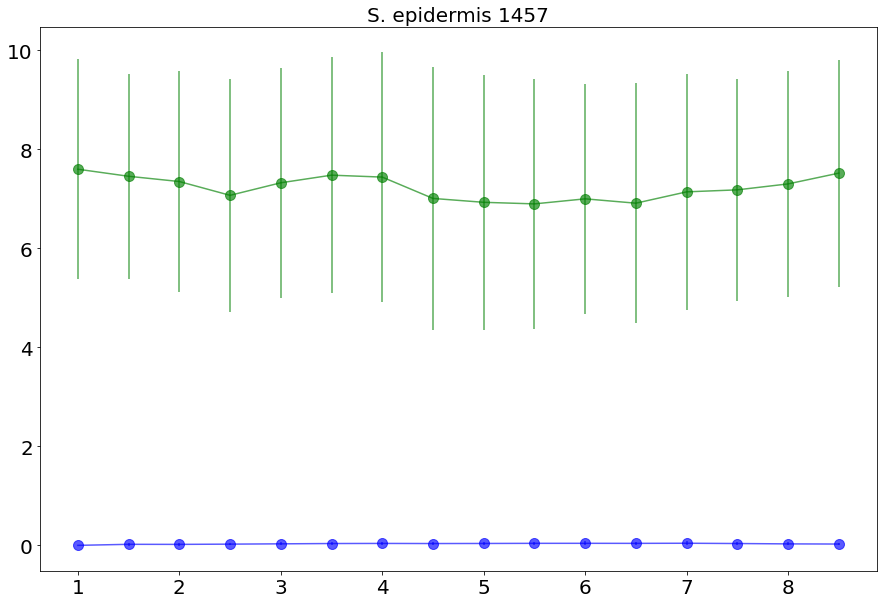

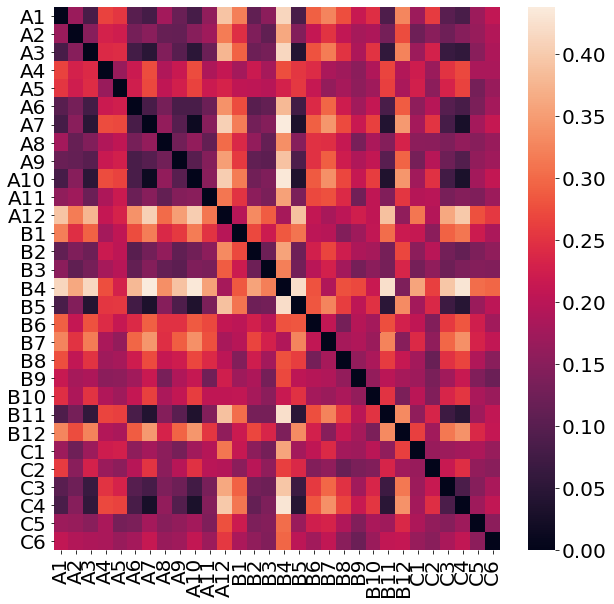

<Figure size 360x360 with 0 Axes>

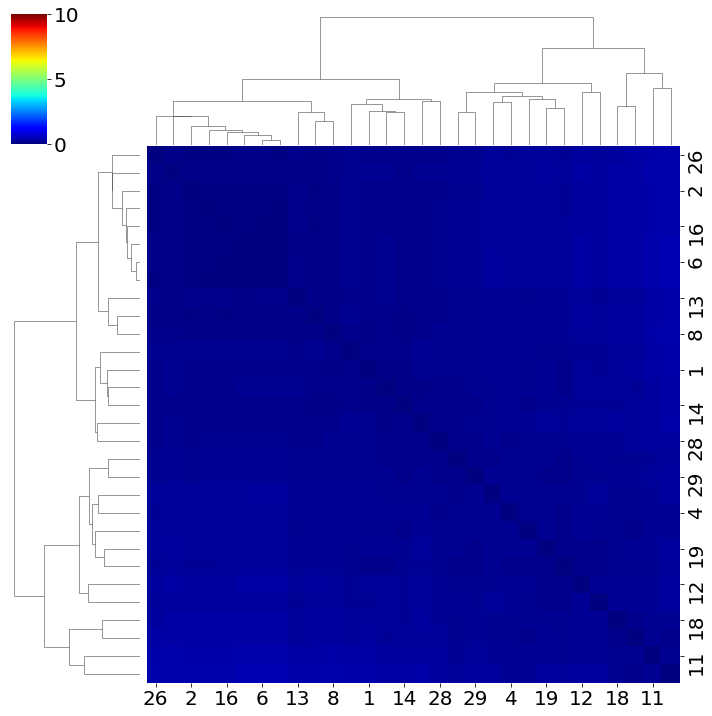

2


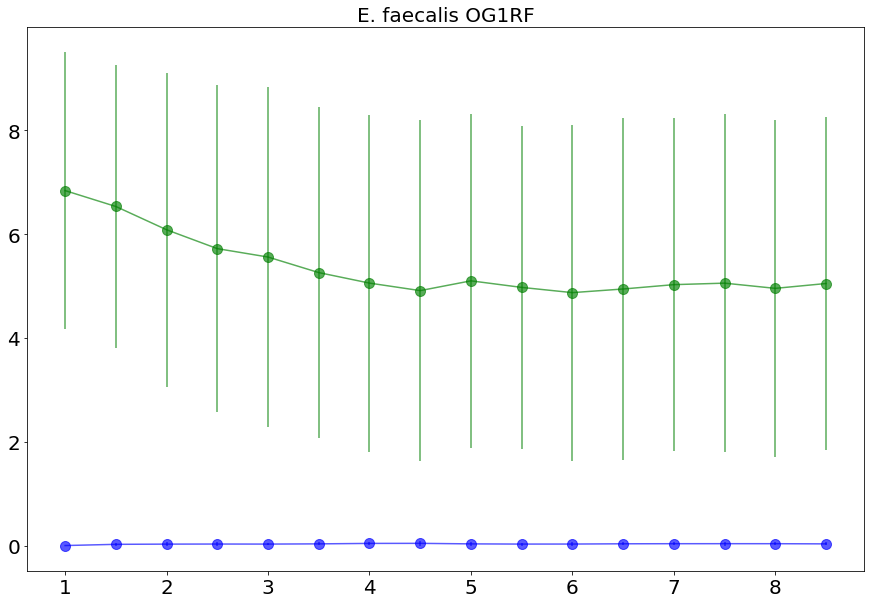

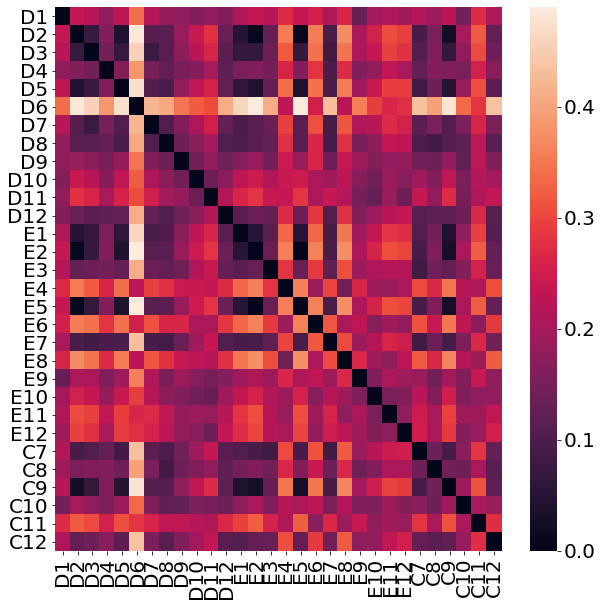

<Figure size 360x360 with 0 Axes>

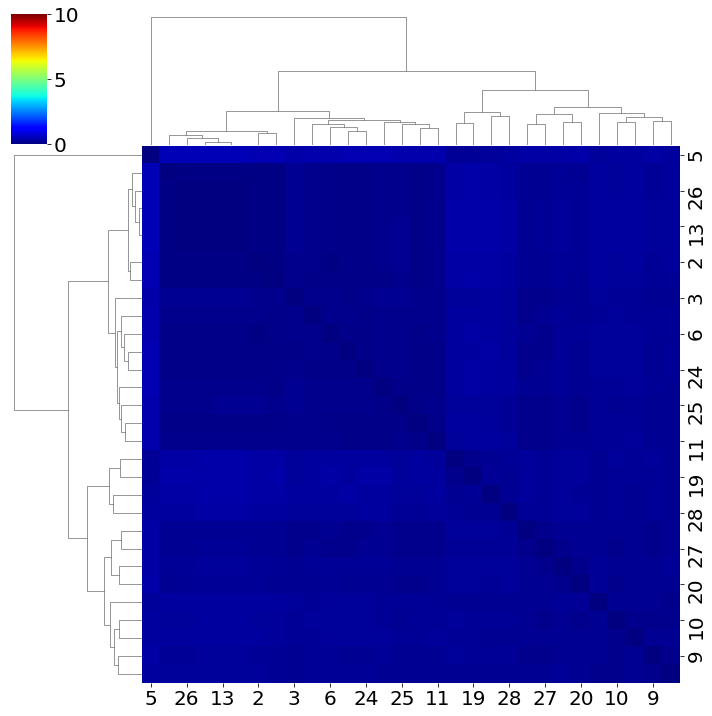

3


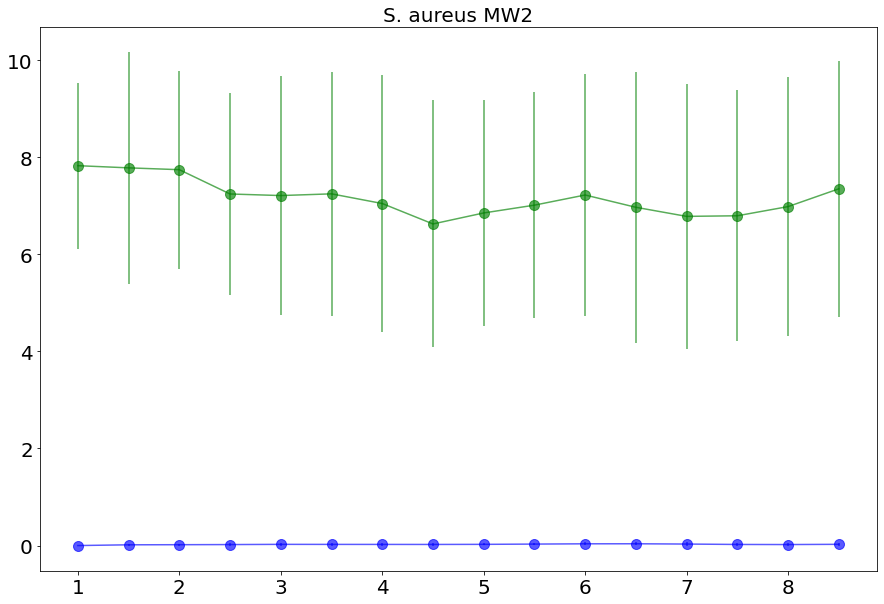

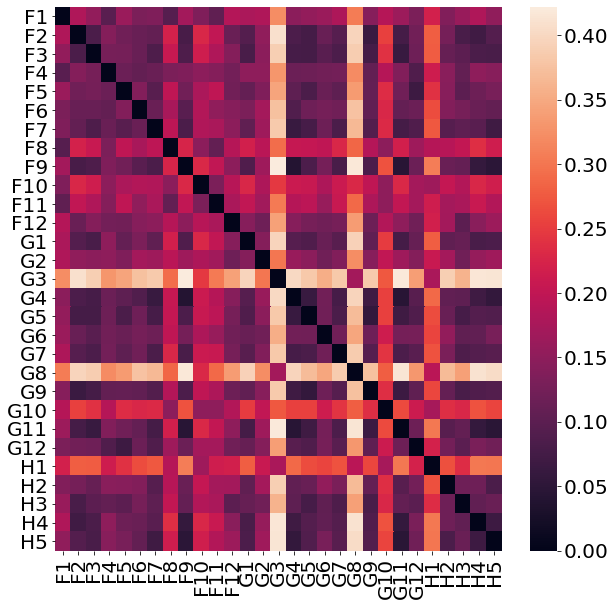

<Figure size 360x360 with 0 Axes>

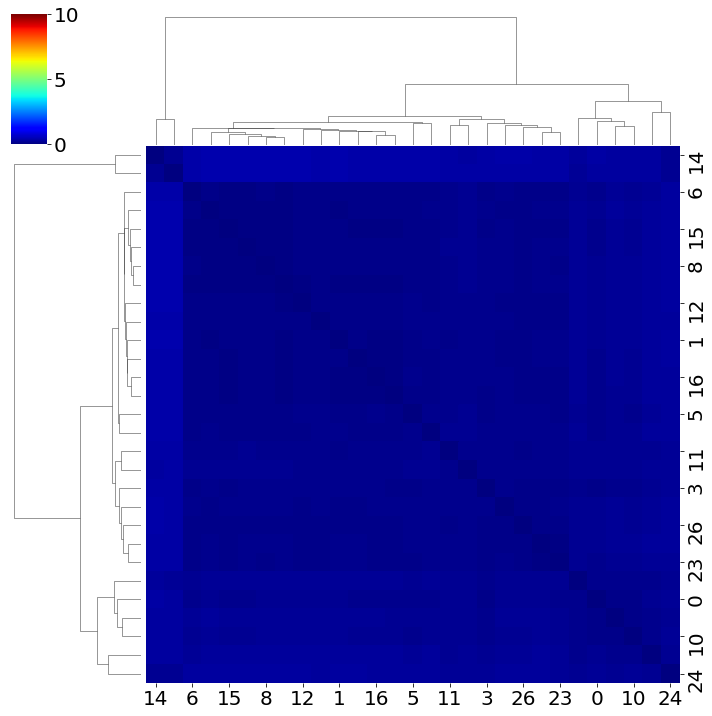

4


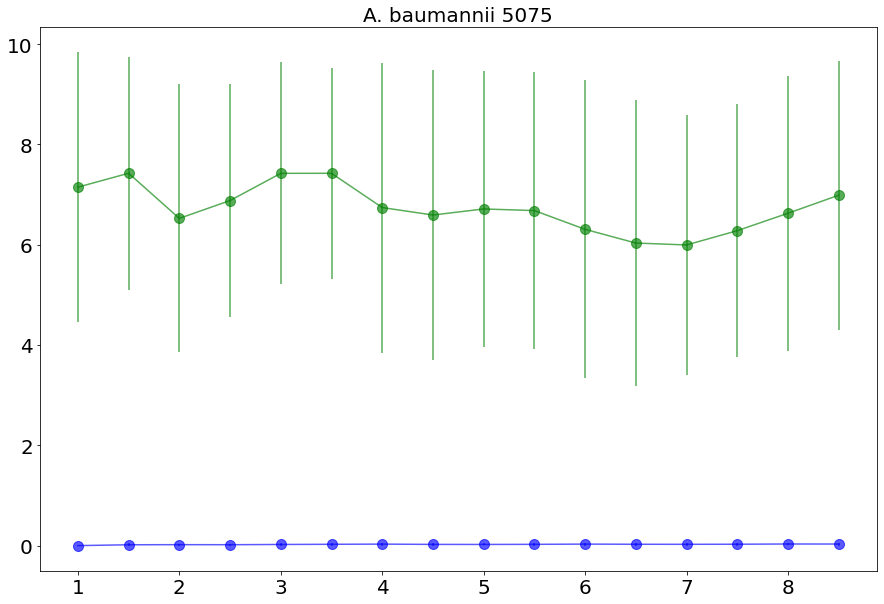

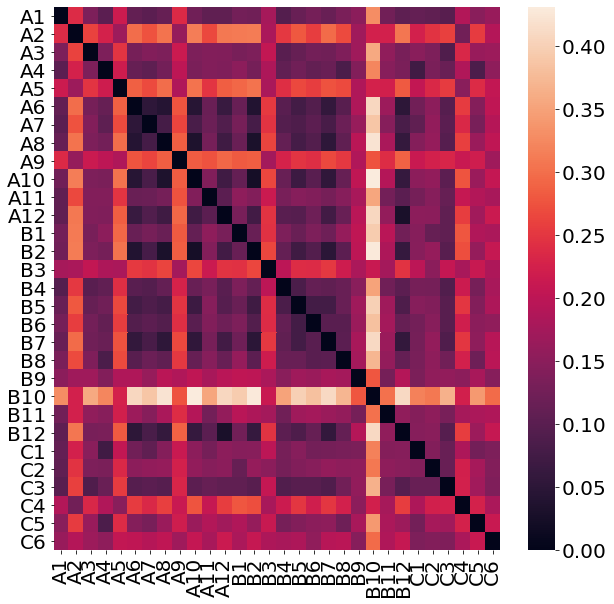

<Figure size 360x360 with 0 Axes>

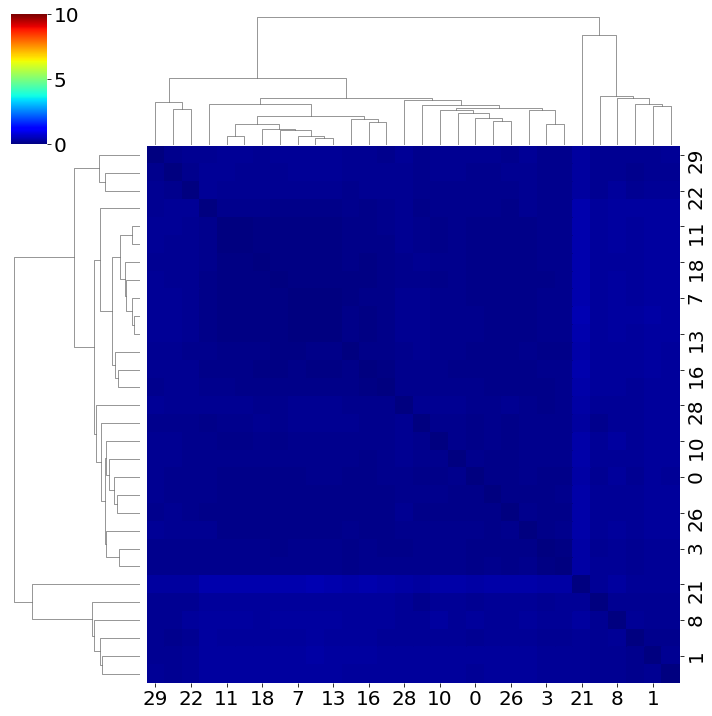

5


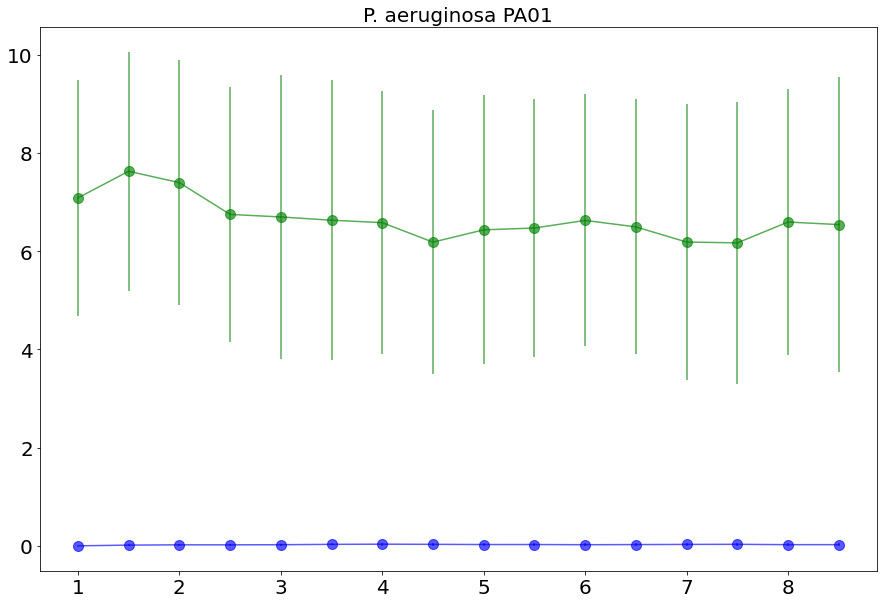

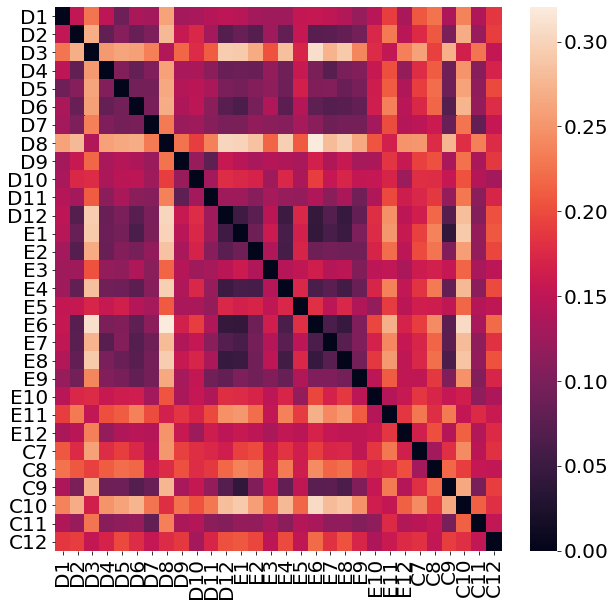

<Figure size 360x360 with 0 Axes>

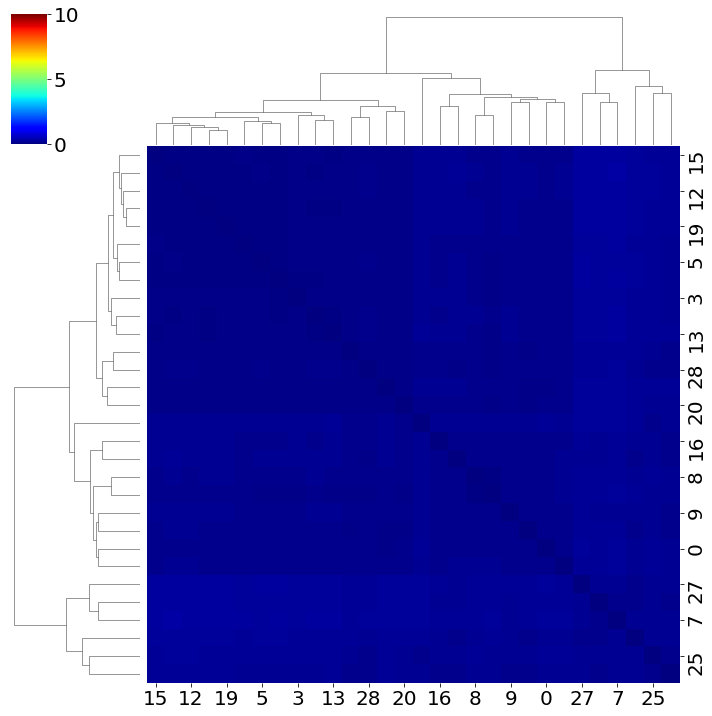

6


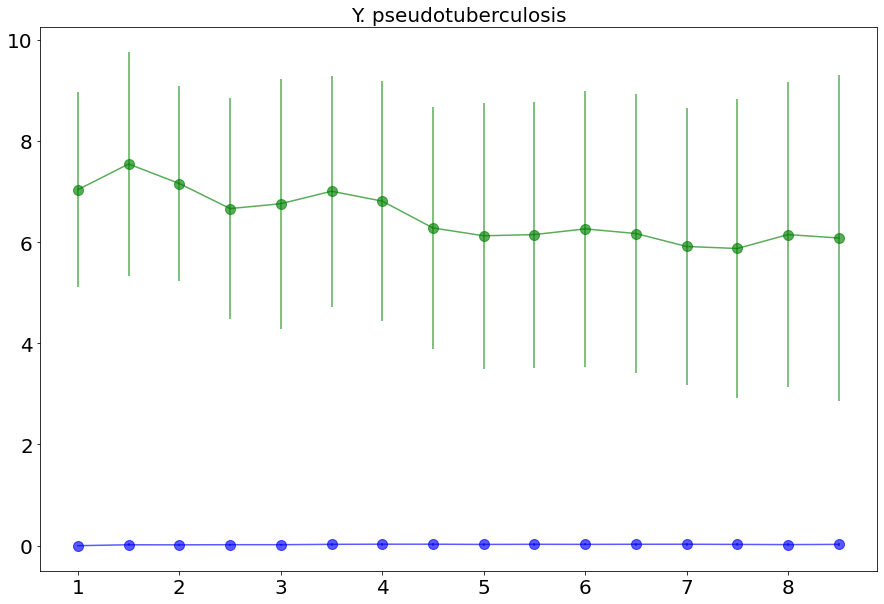

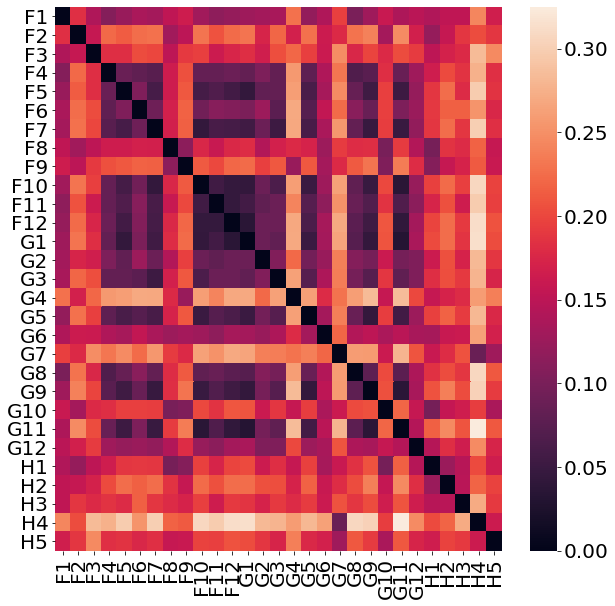

<Figure size 360x360 with 0 Axes>

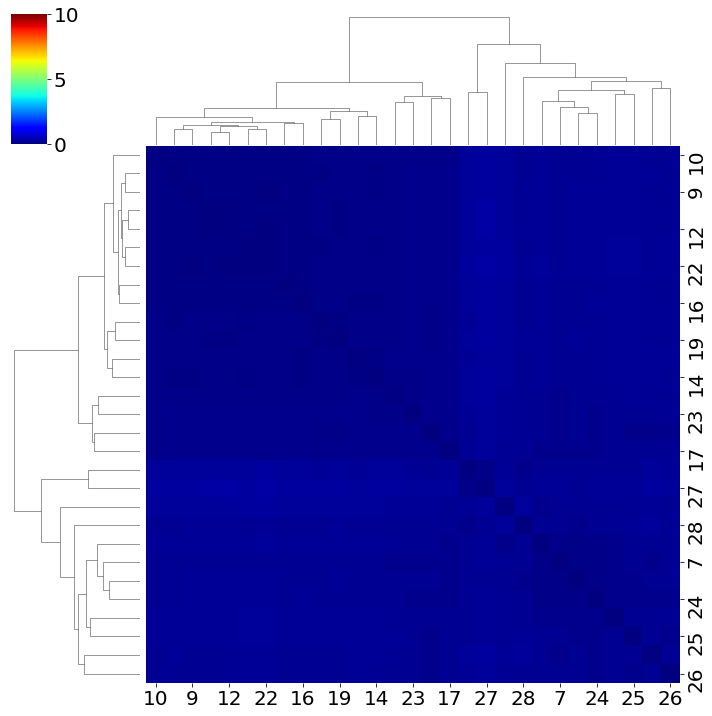

7


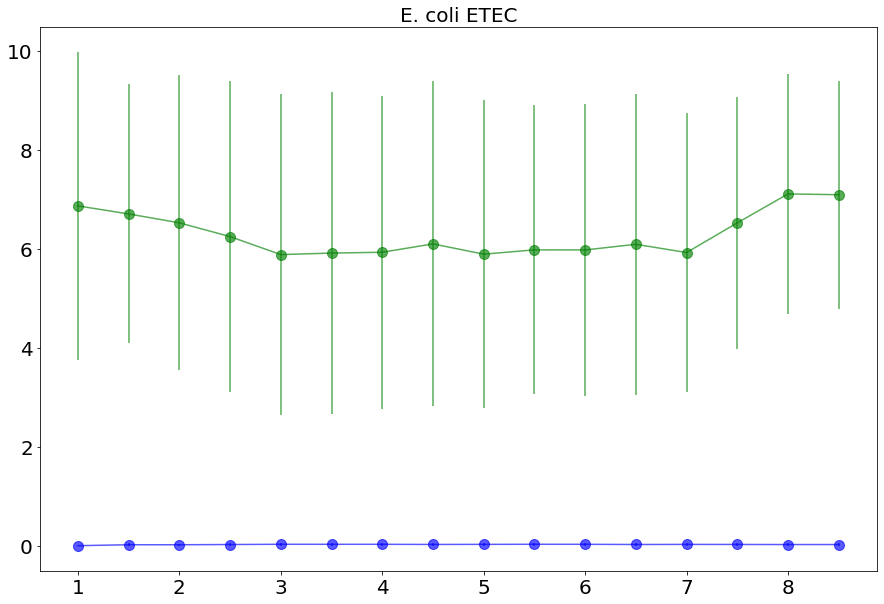

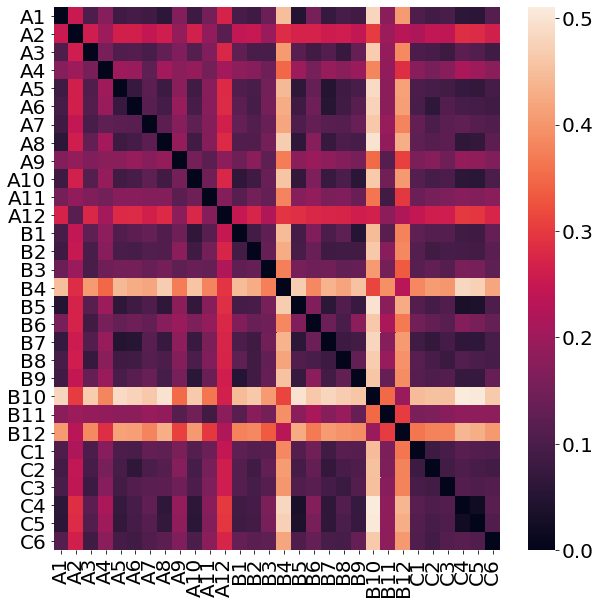

<Figure size 360x360 with 0 Axes>

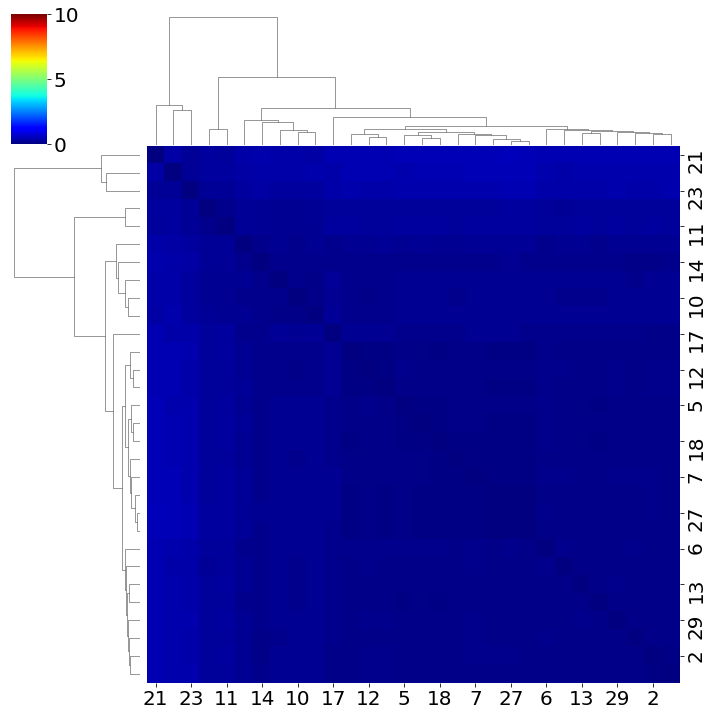

8


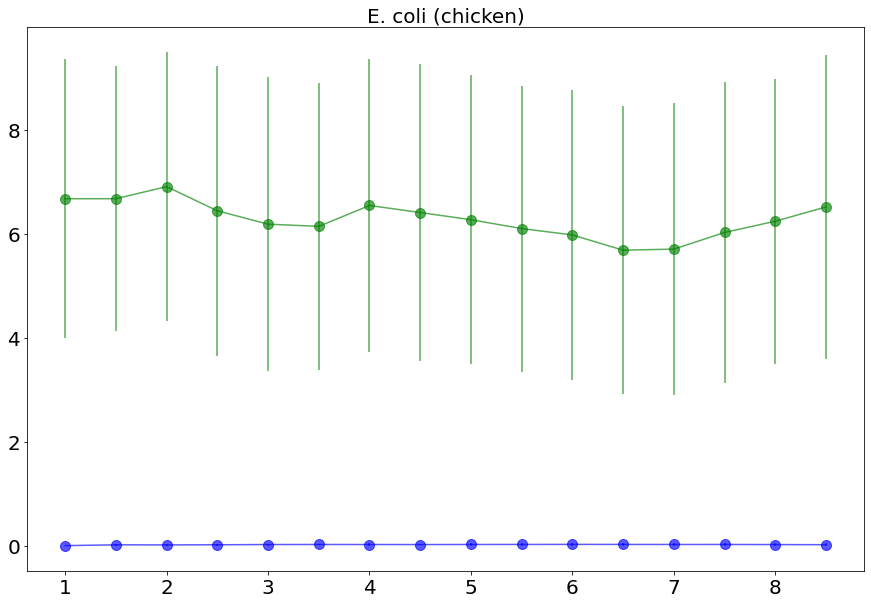

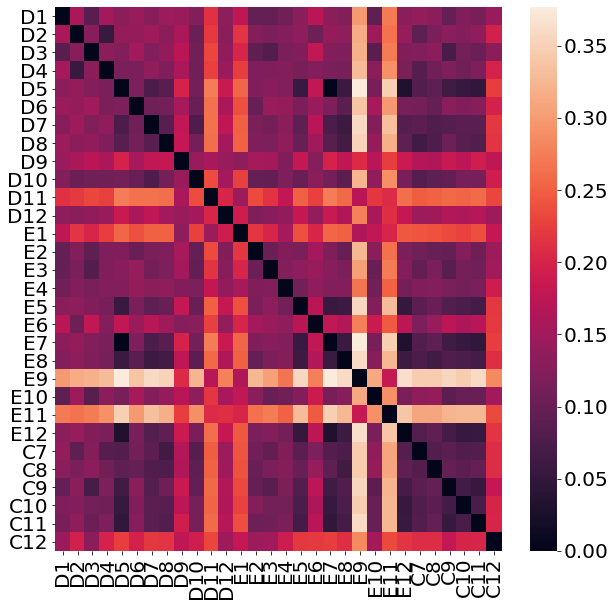

<Figure size 360x360 with 0 Axes>

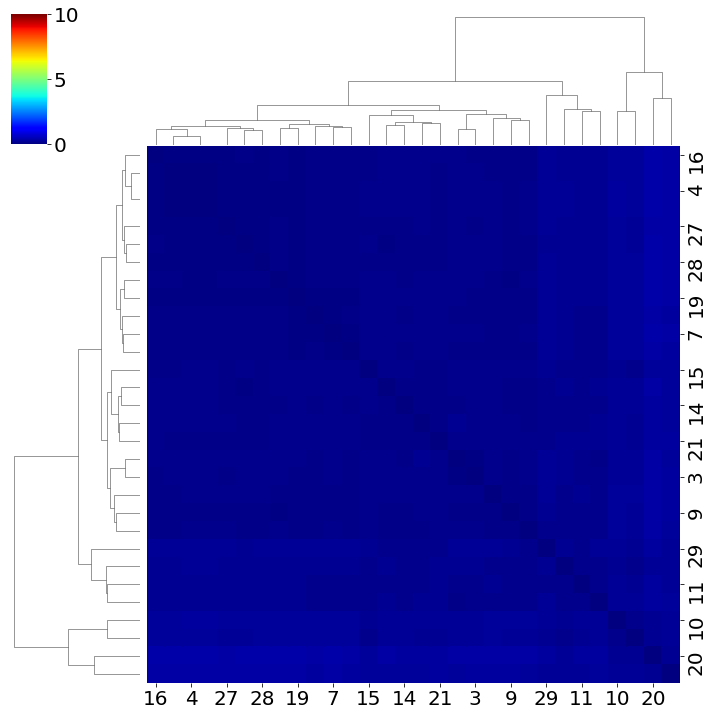

9


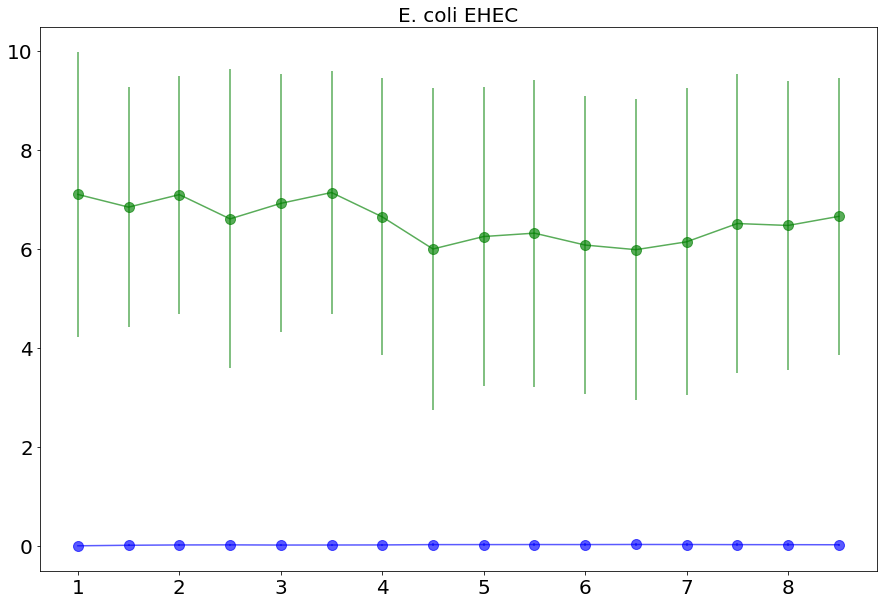

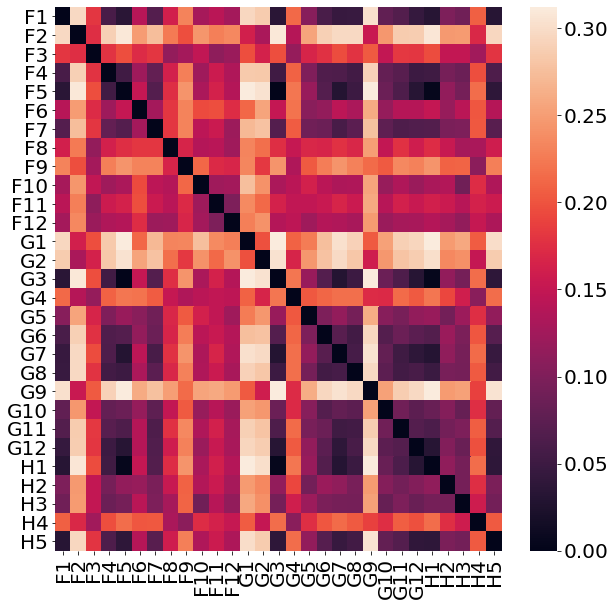

<Figure size 360x360 with 0 Axes>

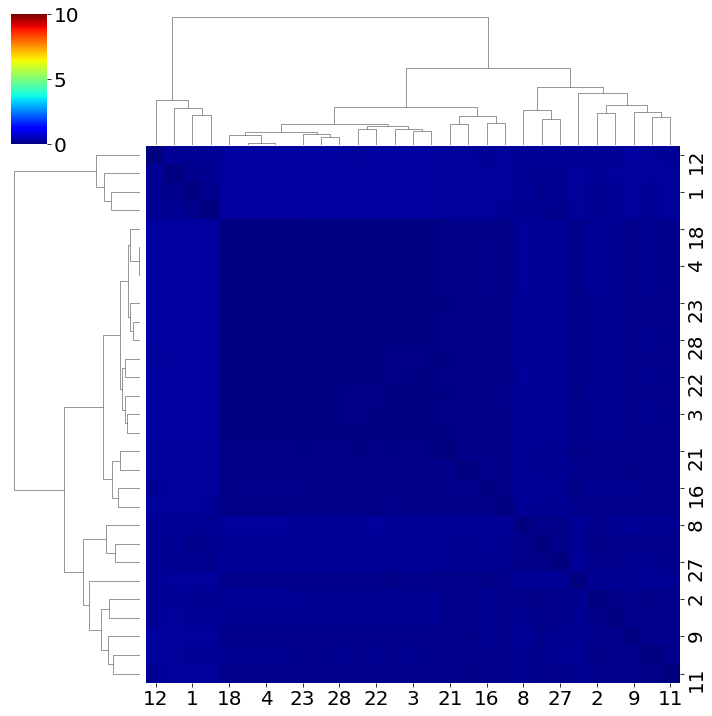

10


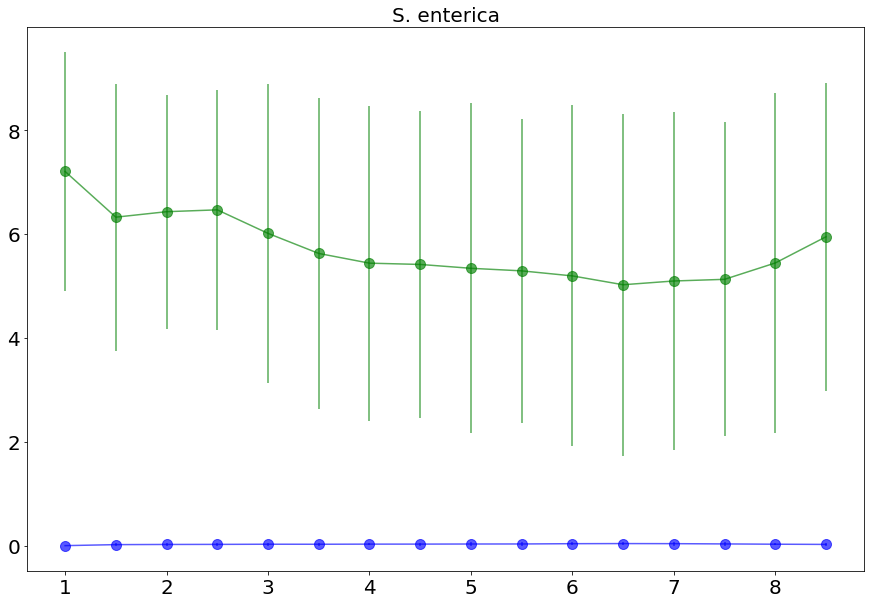

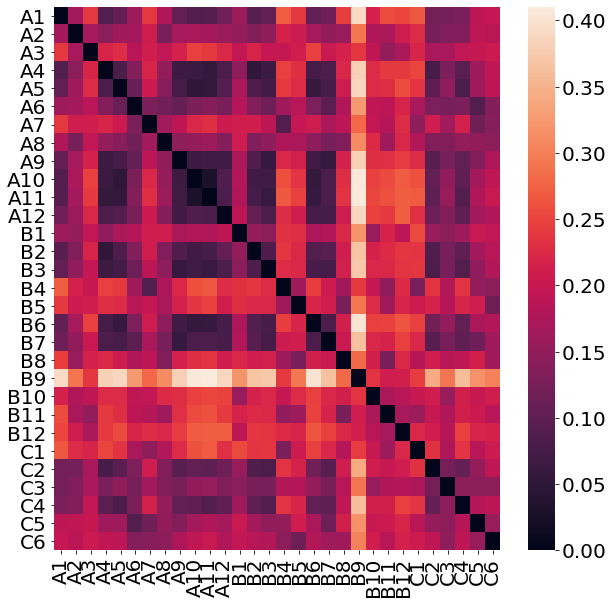

<Figure size 360x360 with 0 Axes>

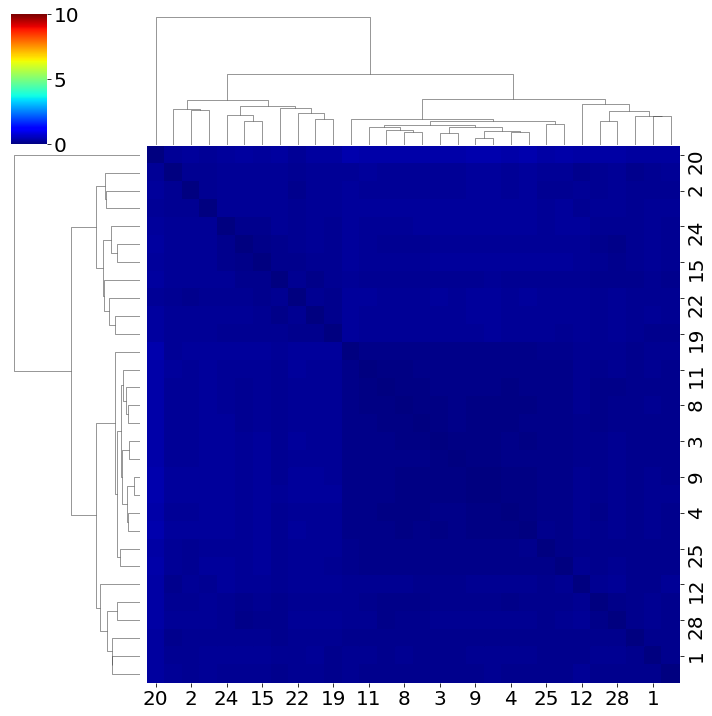

14


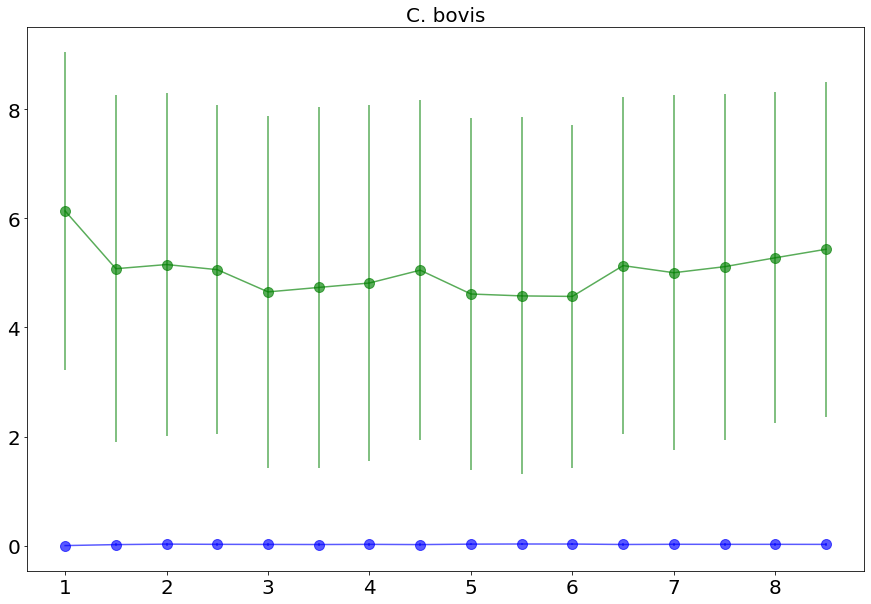

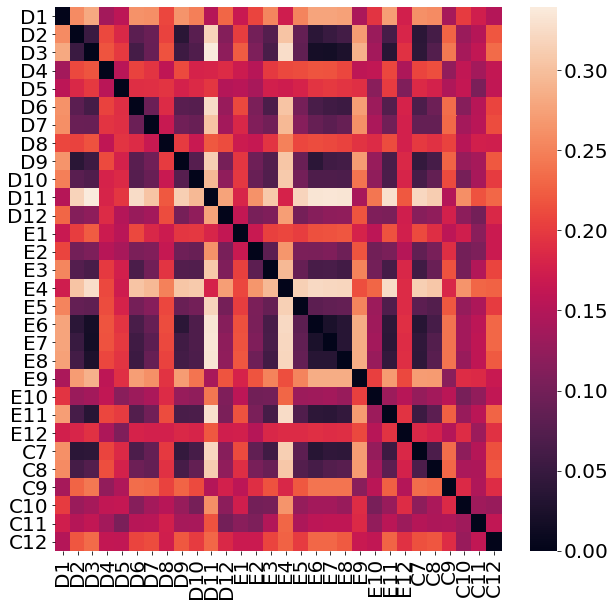

<Figure size 360x360 with 0 Axes>

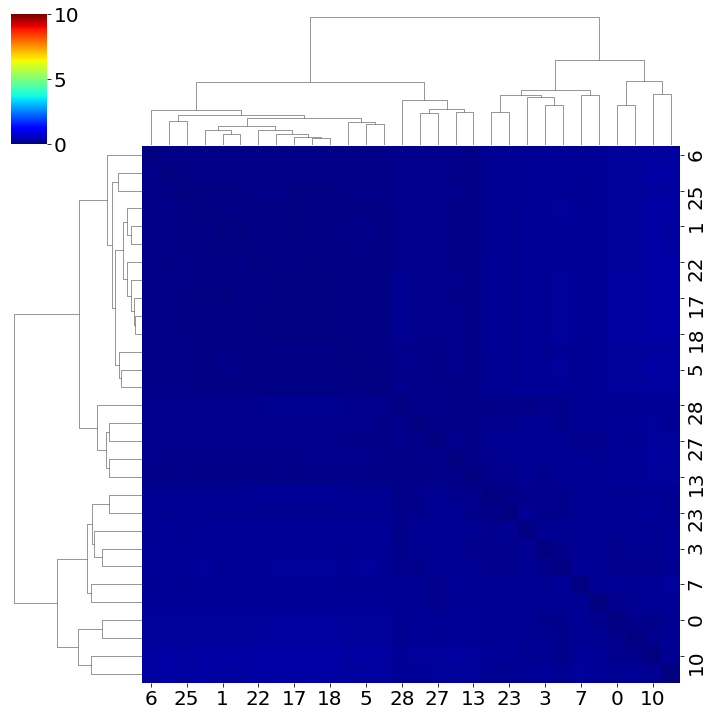

15


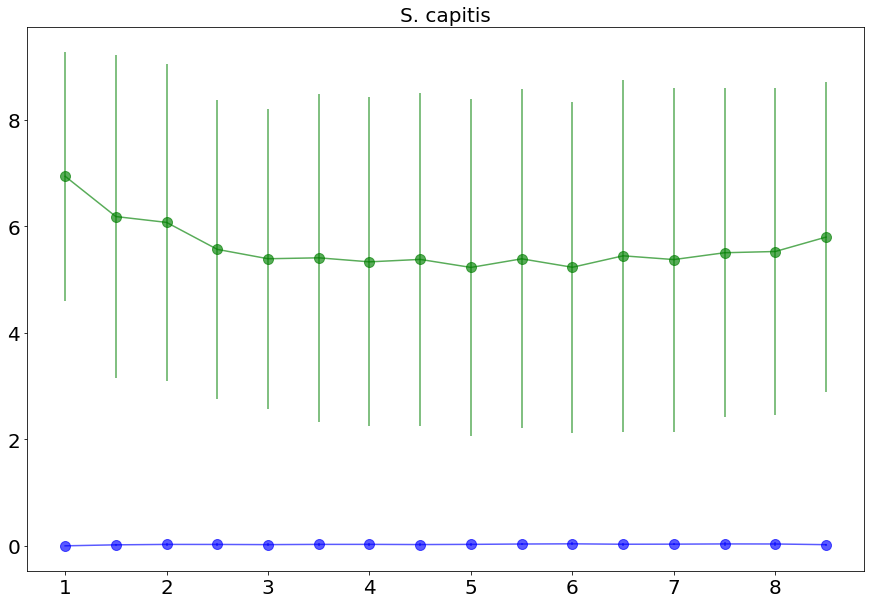

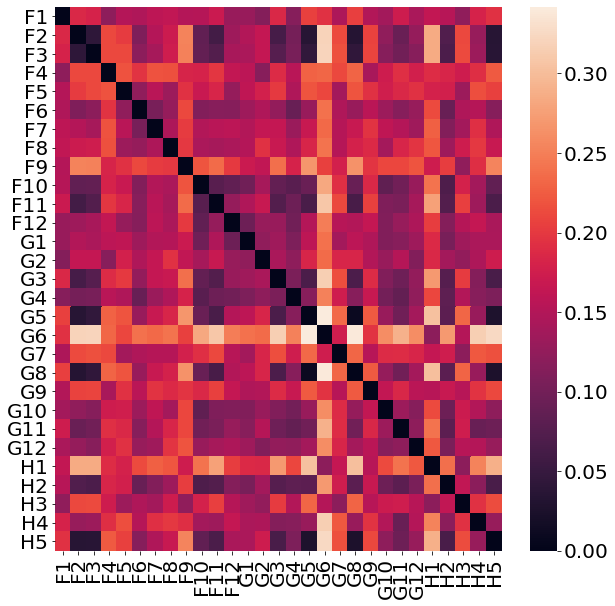

<Figure size 360x360 with 0 Axes>

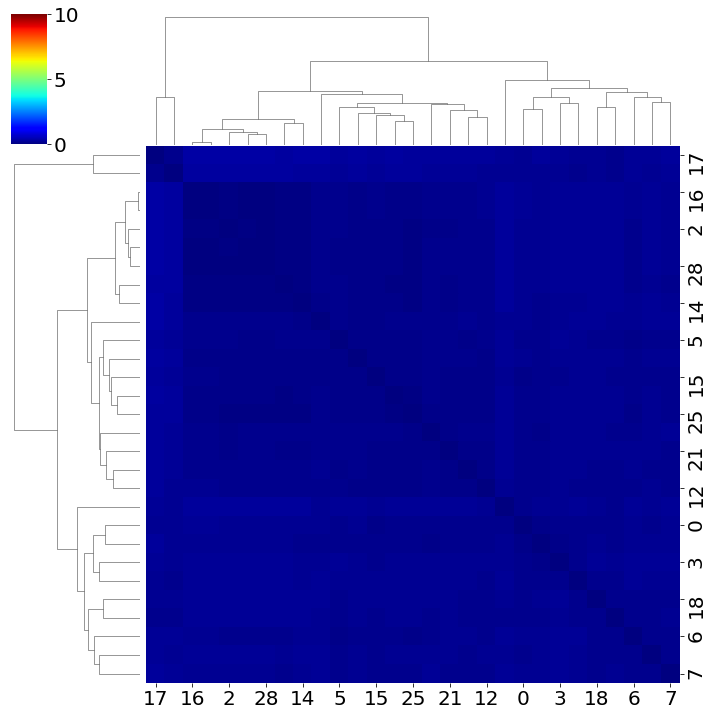

16


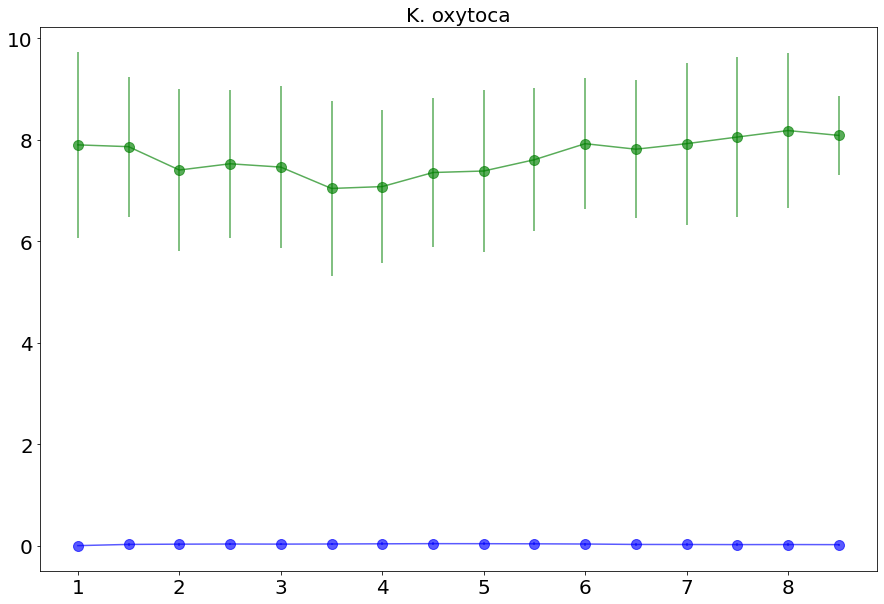

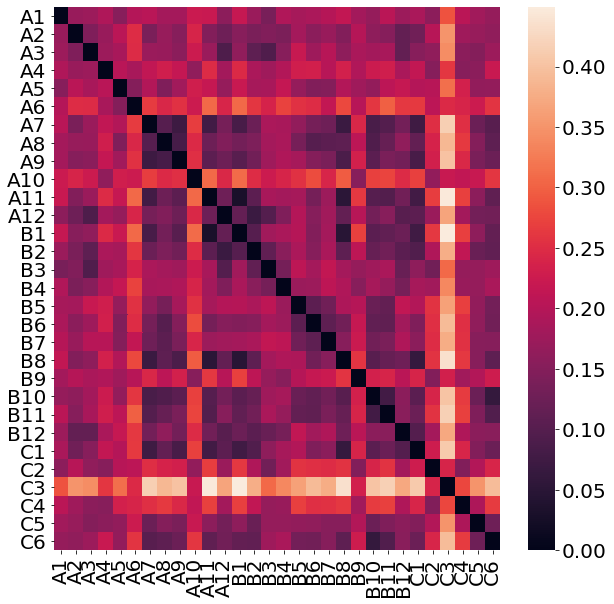

<Figure size 360x360 with 0 Axes>

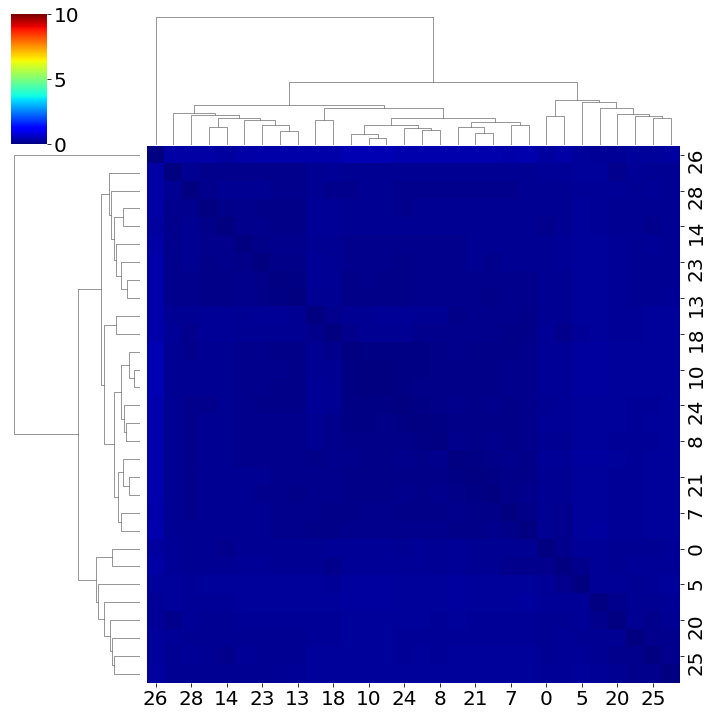

17


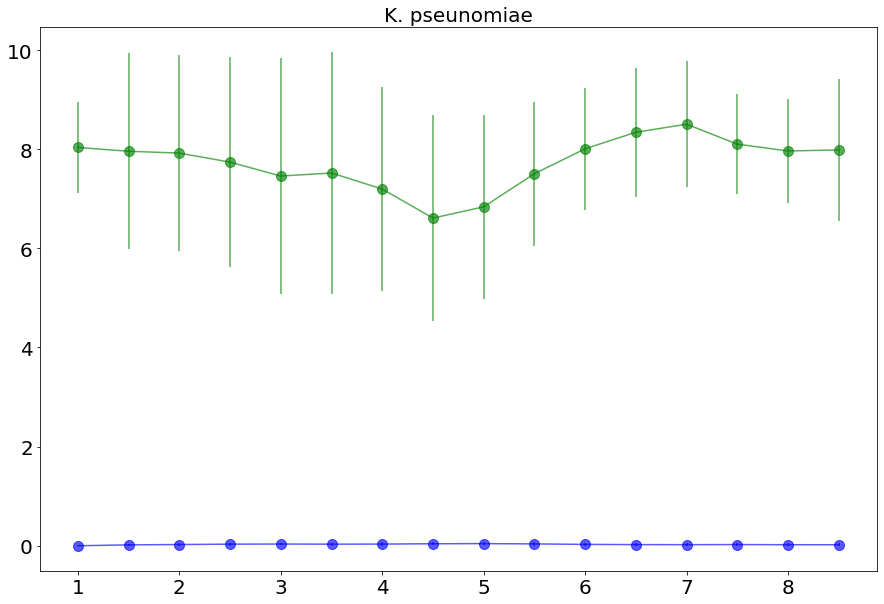

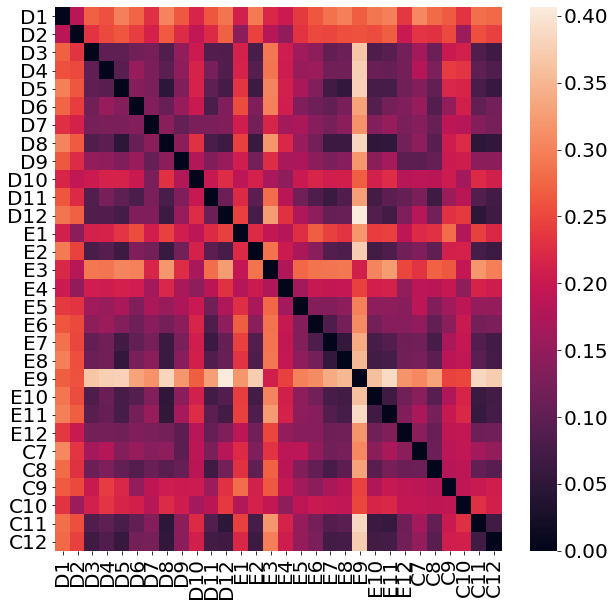

<Figure size 360x360 with 0 Axes>

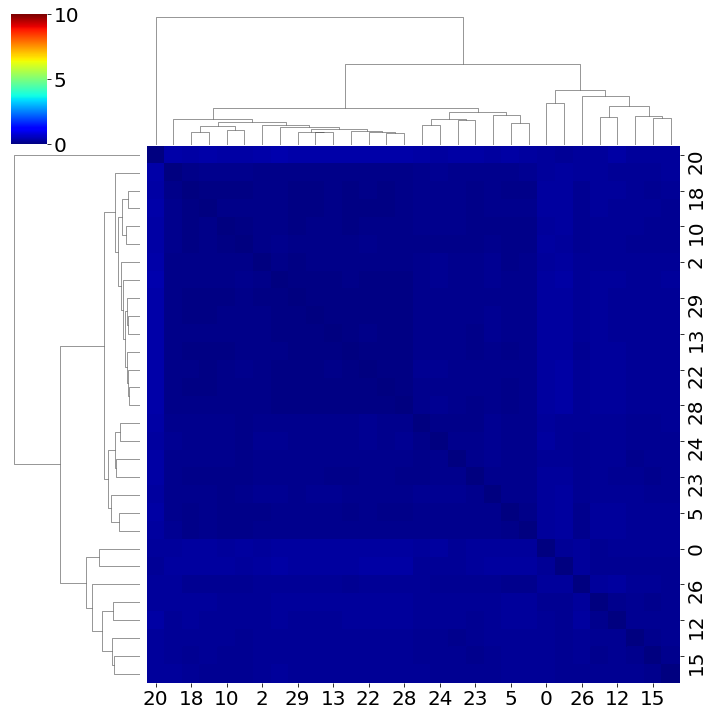

18


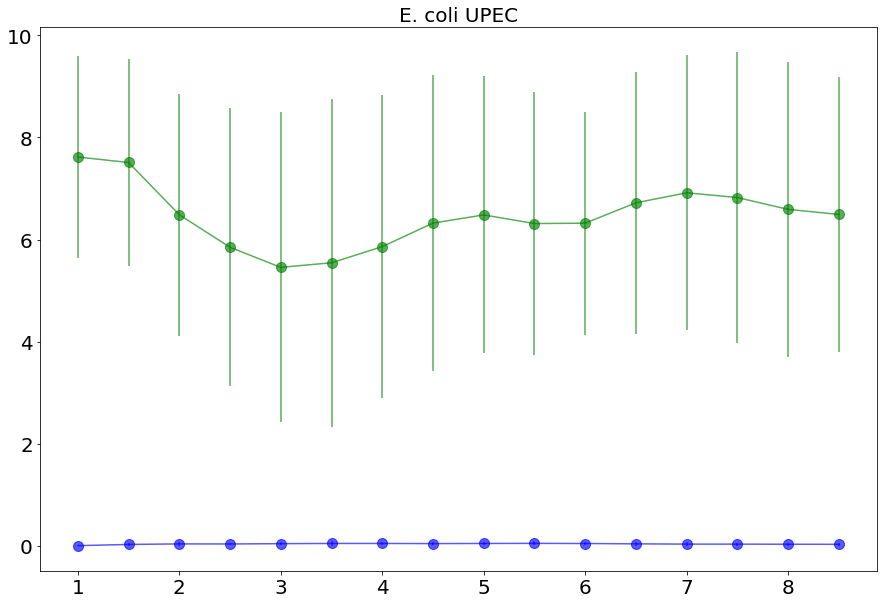

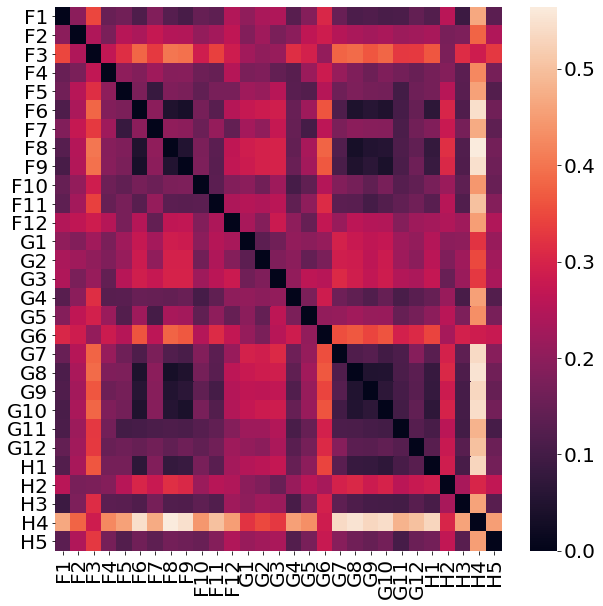

<Figure size 360x360 with 0 Axes>

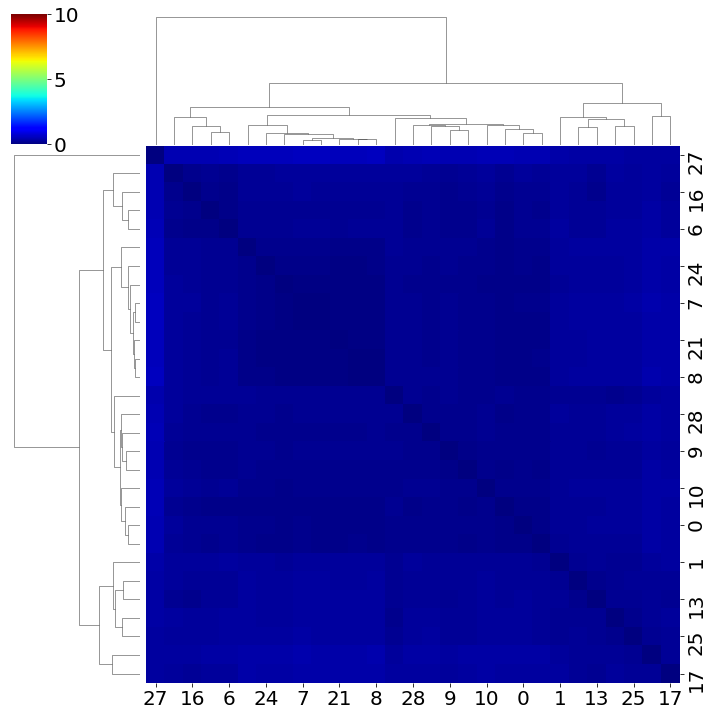

19


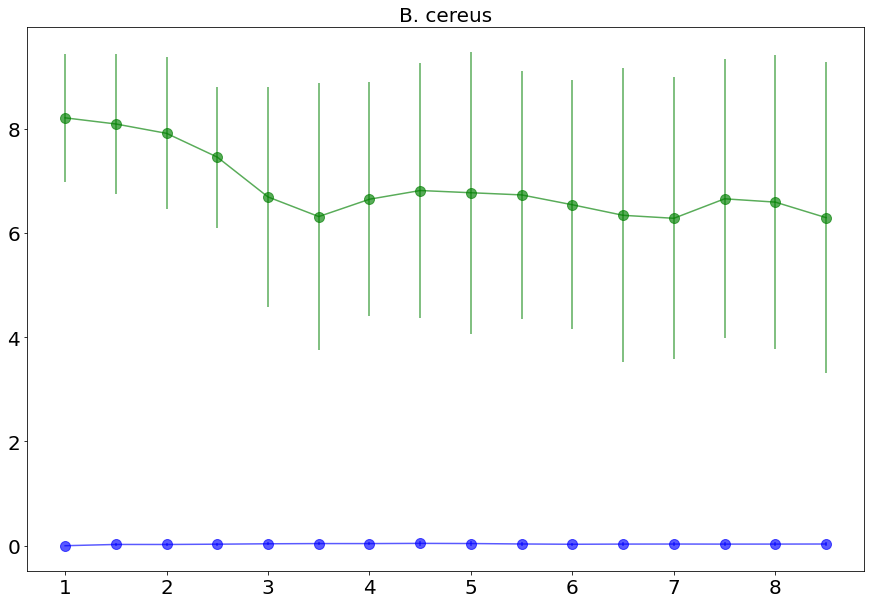

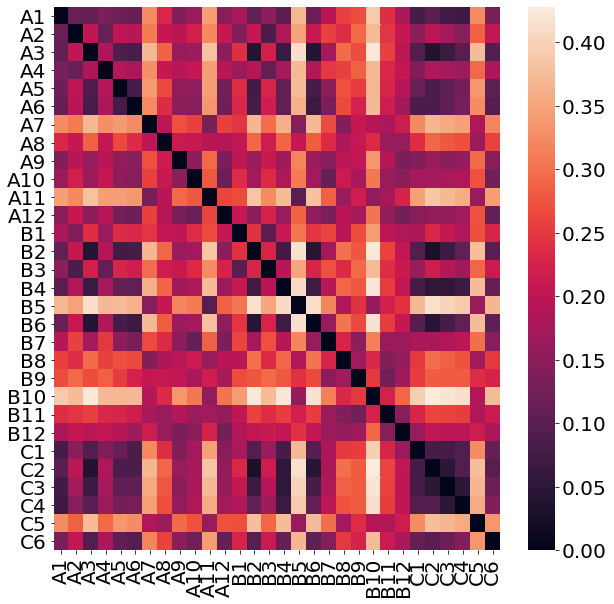

<Figure size 360x360 with 0 Axes>

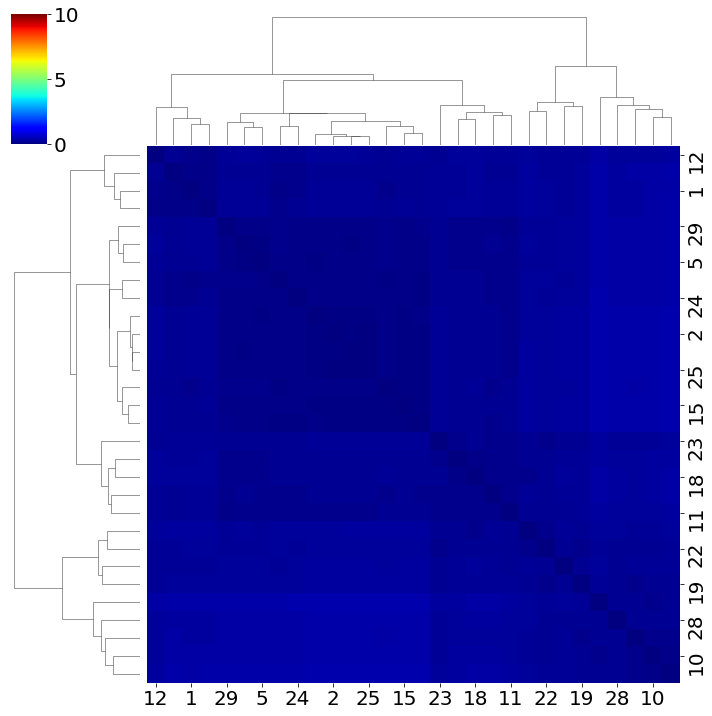

20


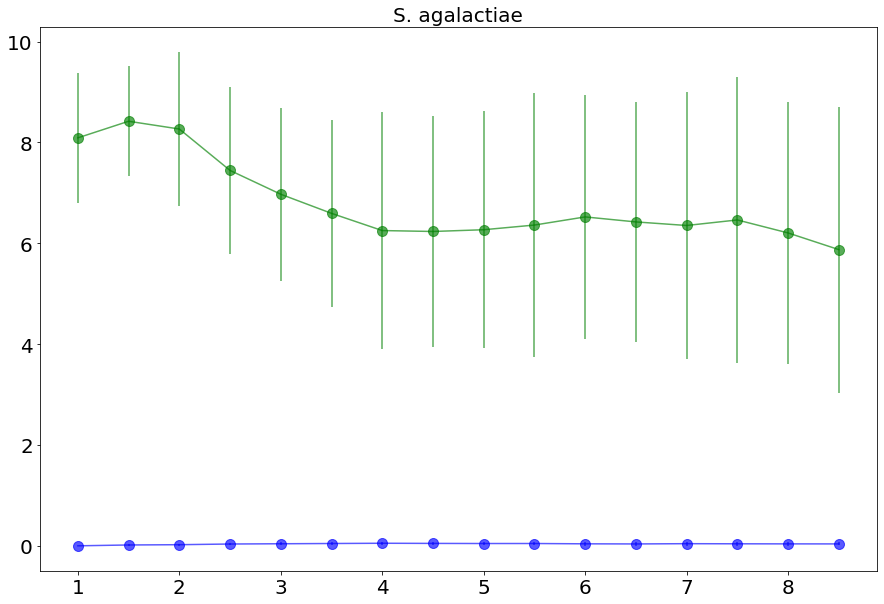

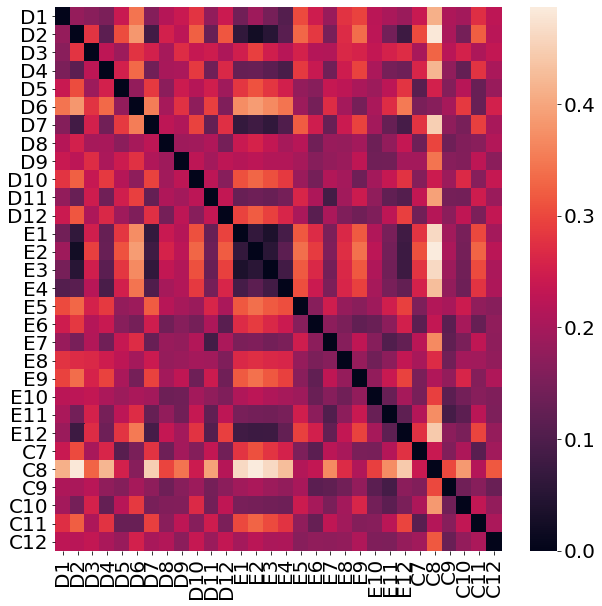

<Figure size 360x360 with 0 Axes>

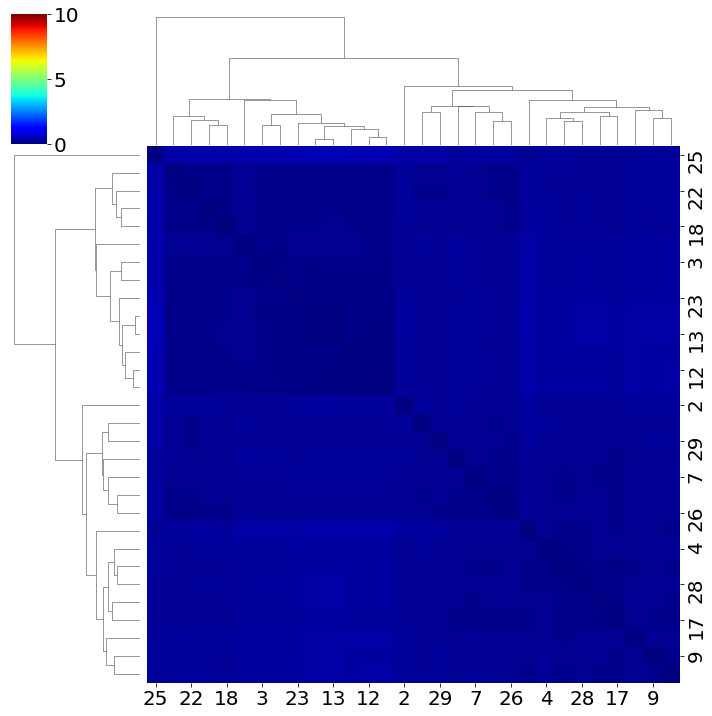

21


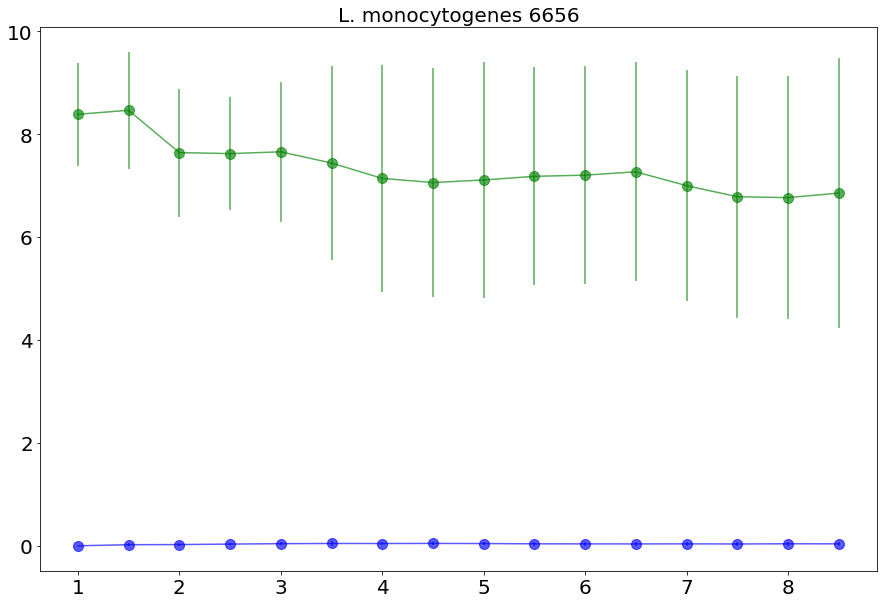

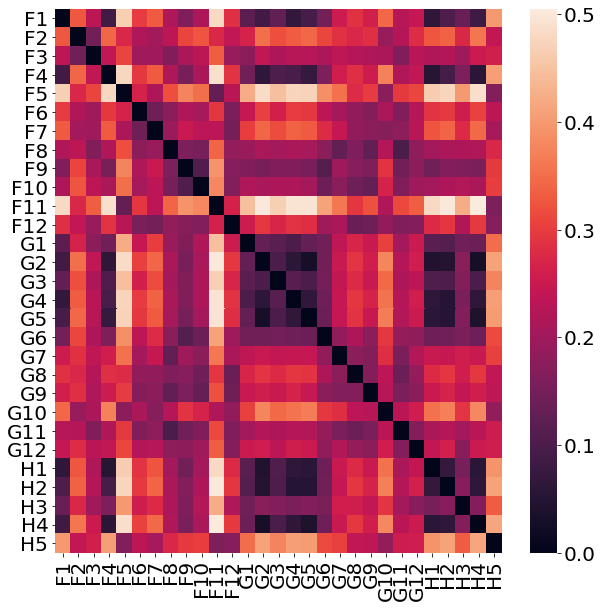

<Figure size 360x360 with 0 Axes>

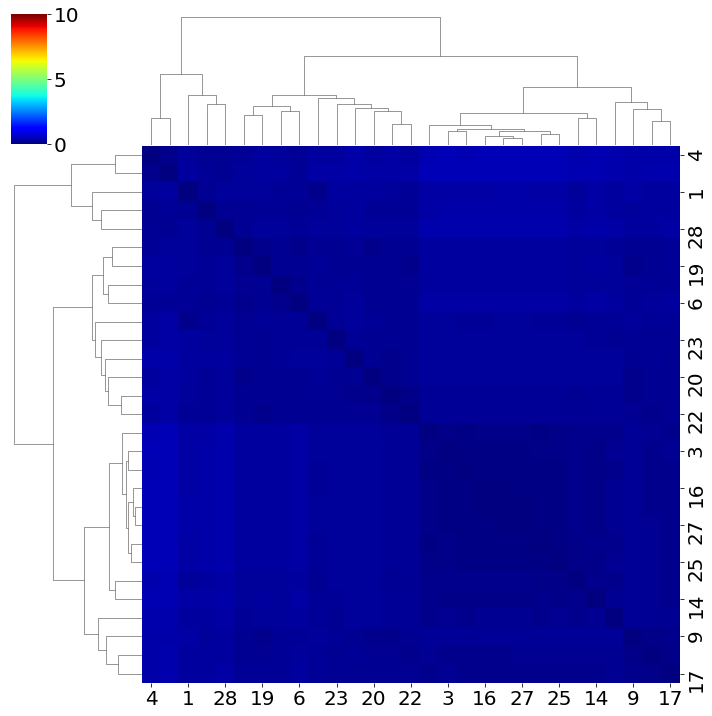

22


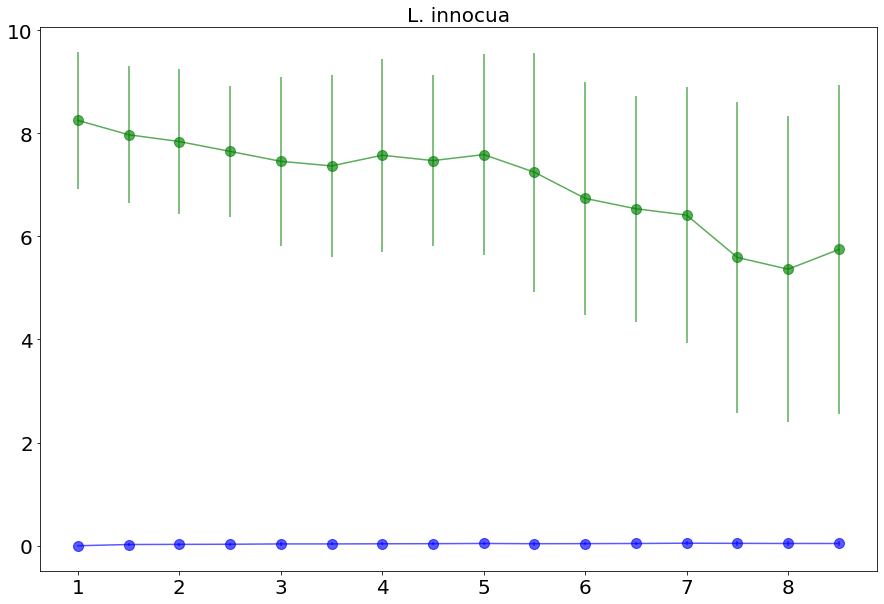

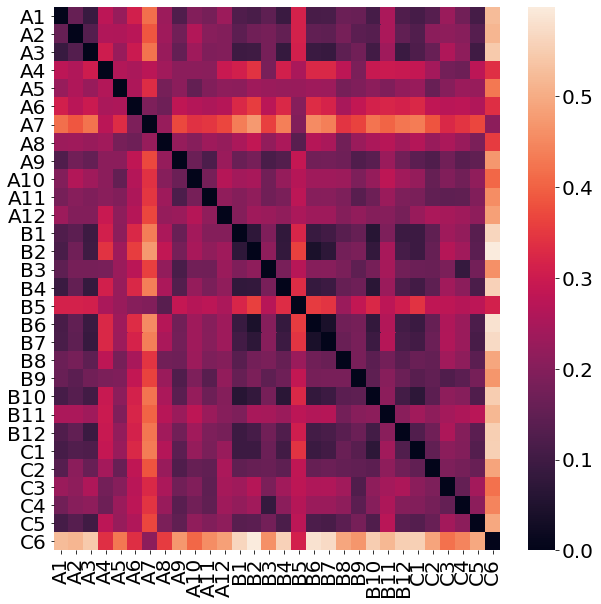

<Figure size 360x360 with 0 Axes>

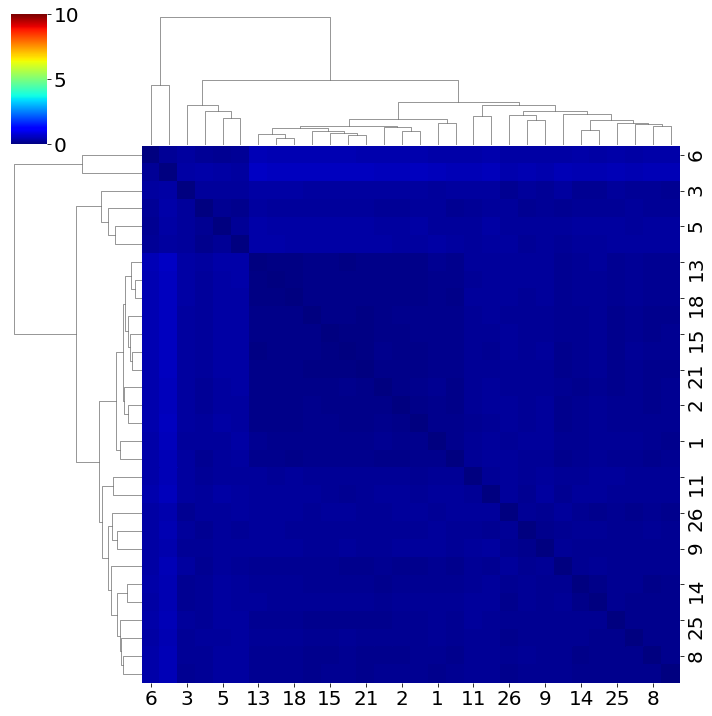

23


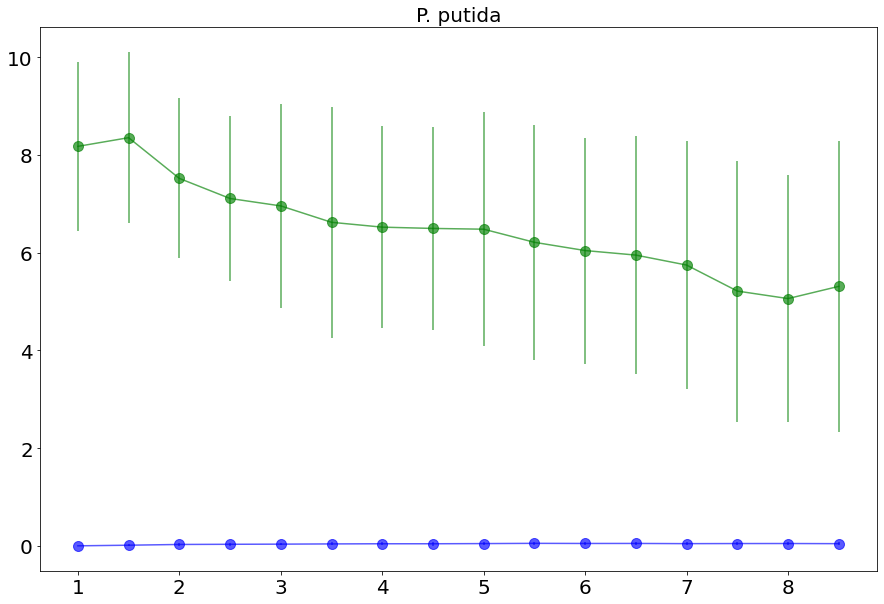

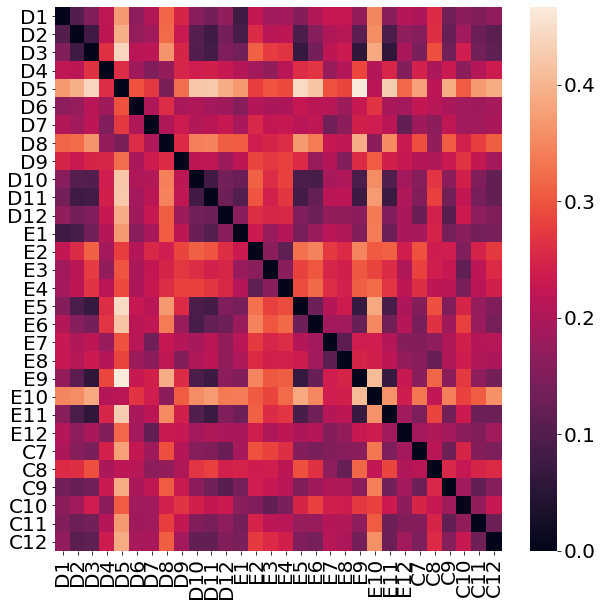

<Figure size 360x360 with 0 Axes>

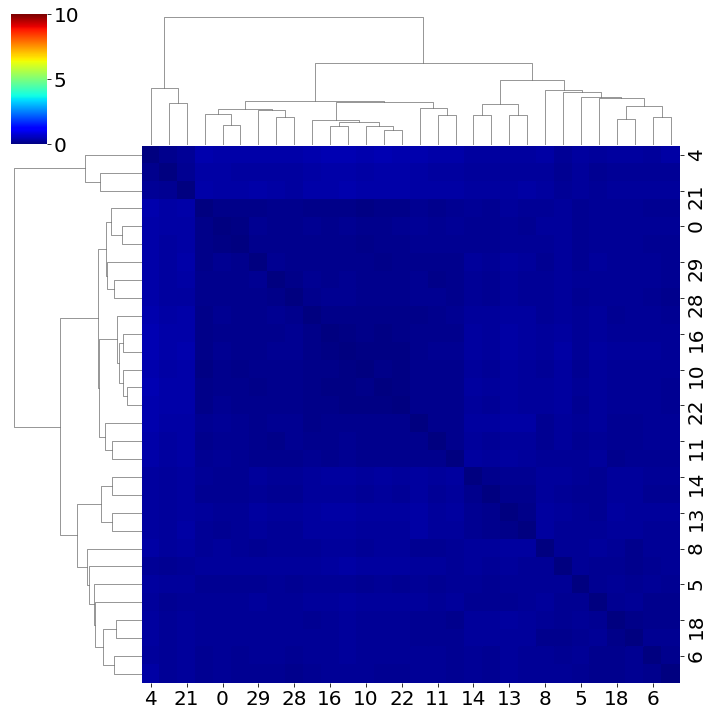

30


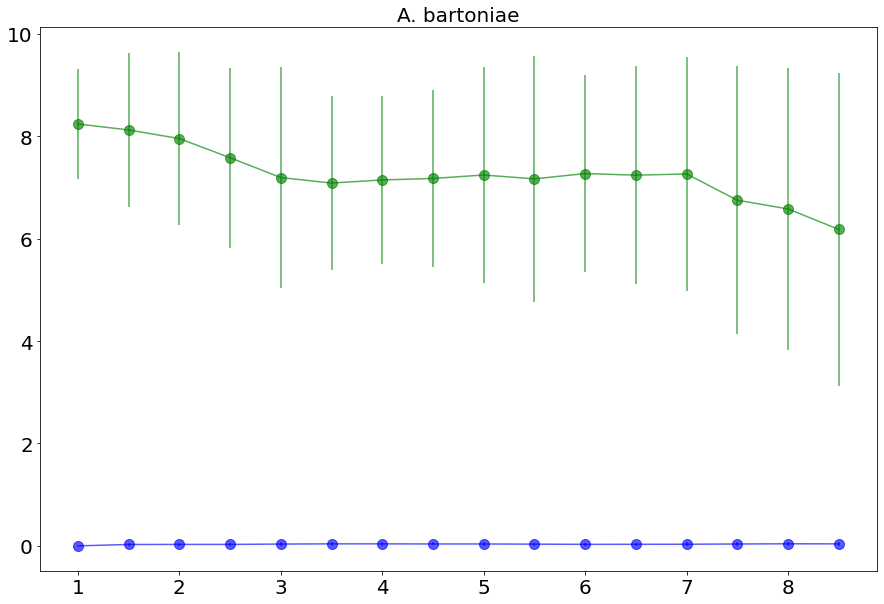

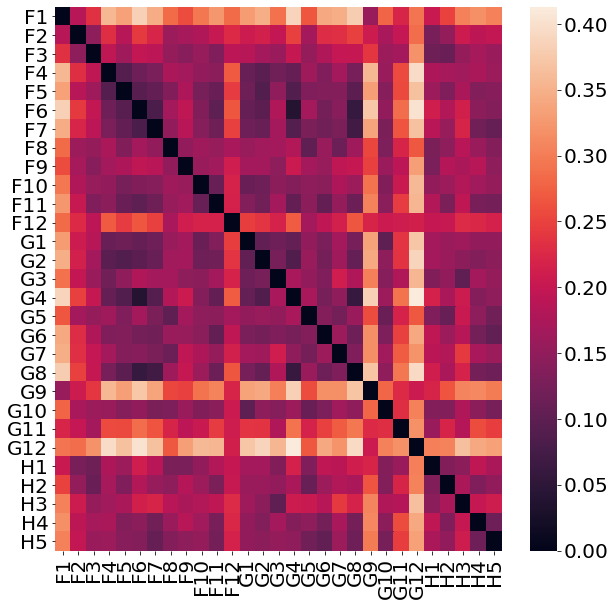

<Figure size 360x360 with 0 Axes>

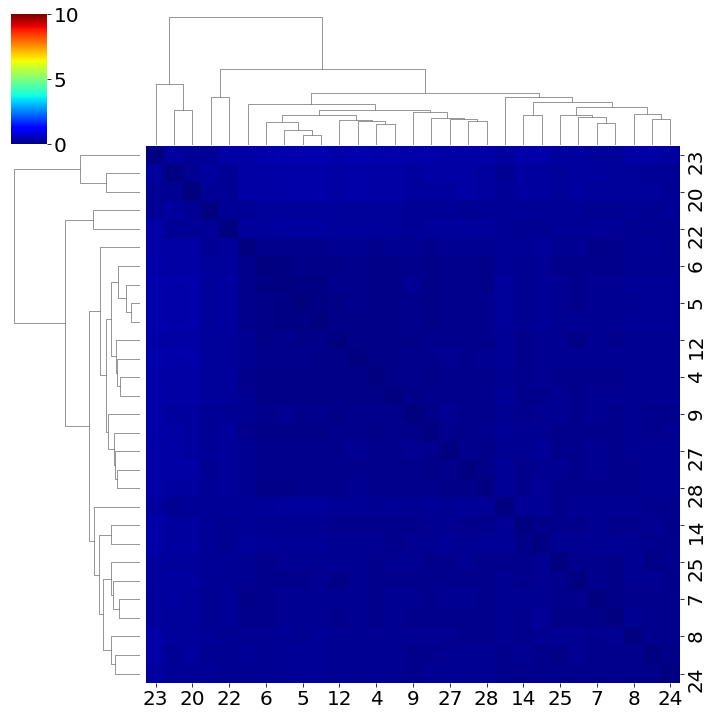

24


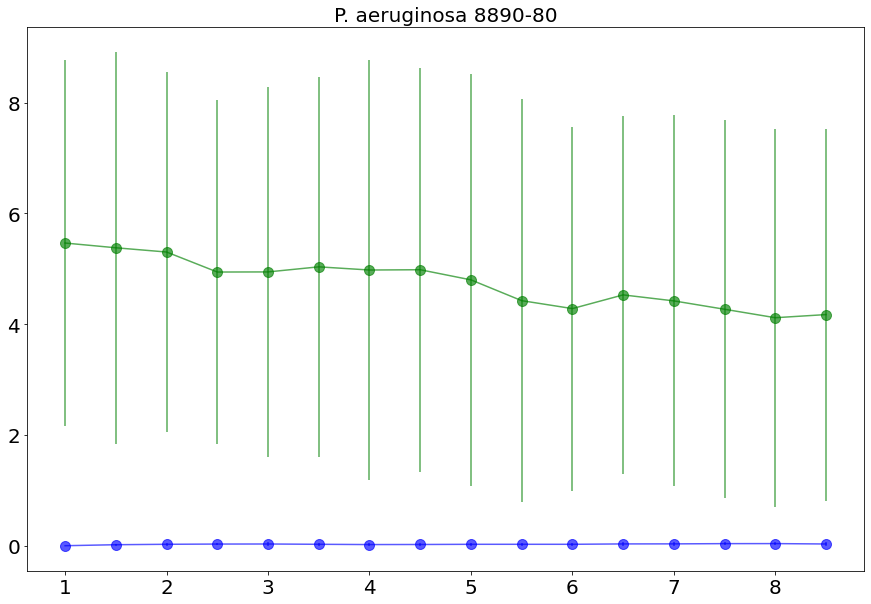

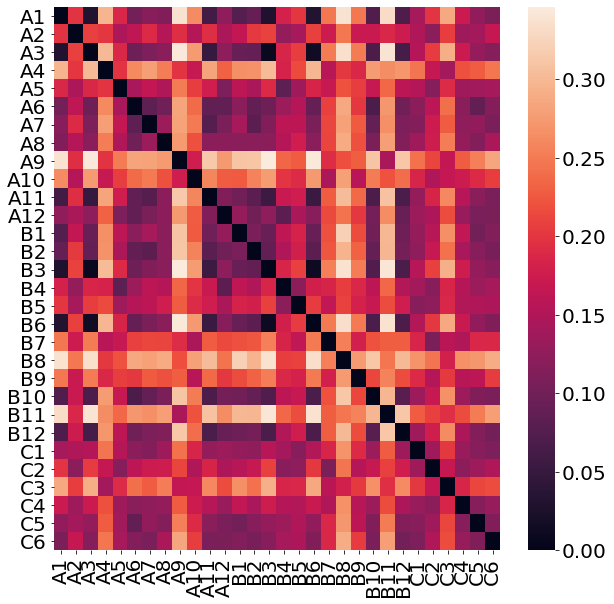

<Figure size 360x360 with 0 Axes>

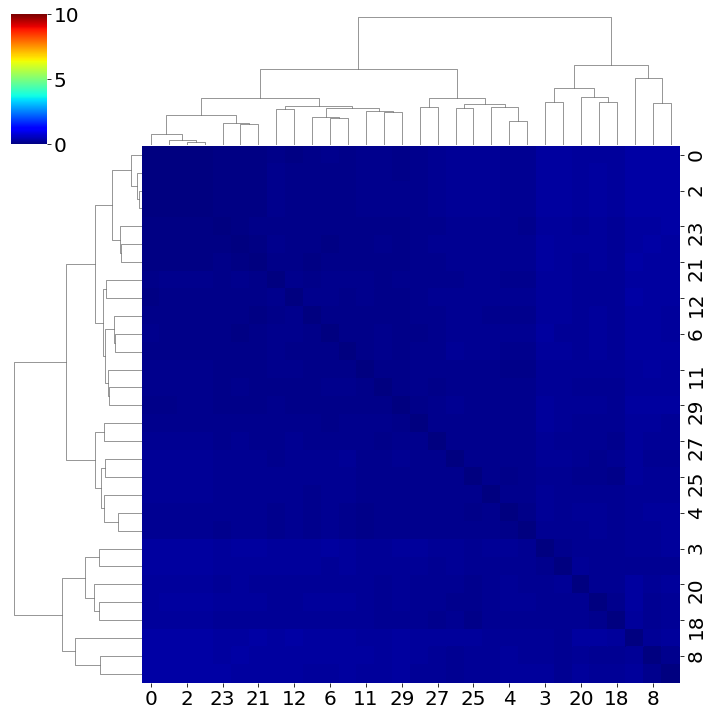

25


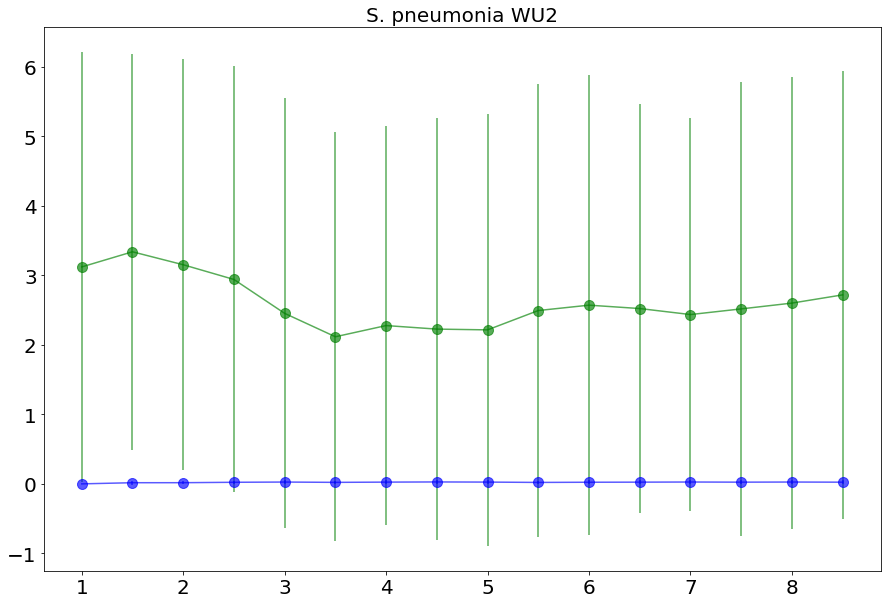

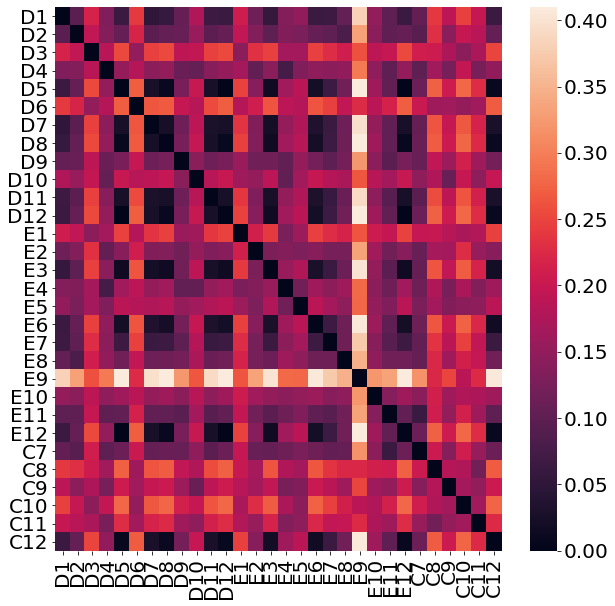

<Figure size 360x360 with 0 Axes>

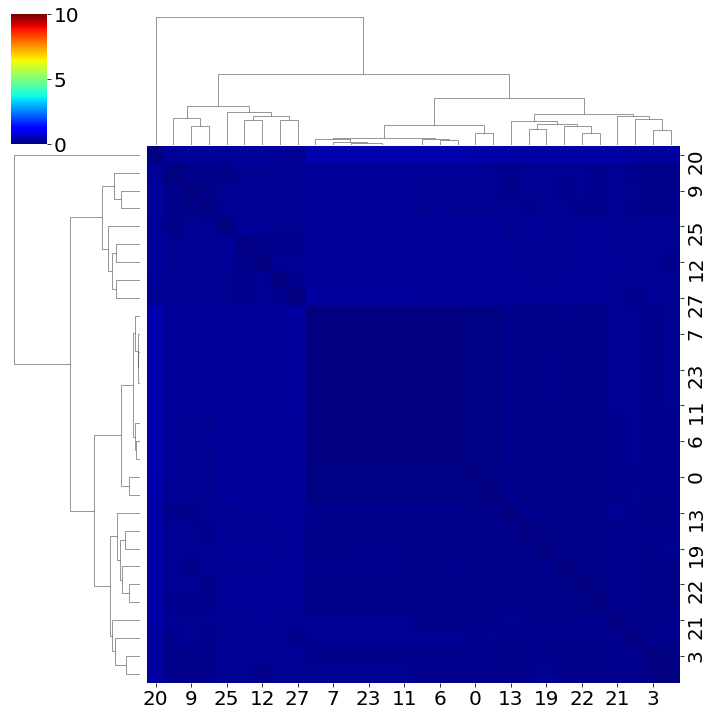

26


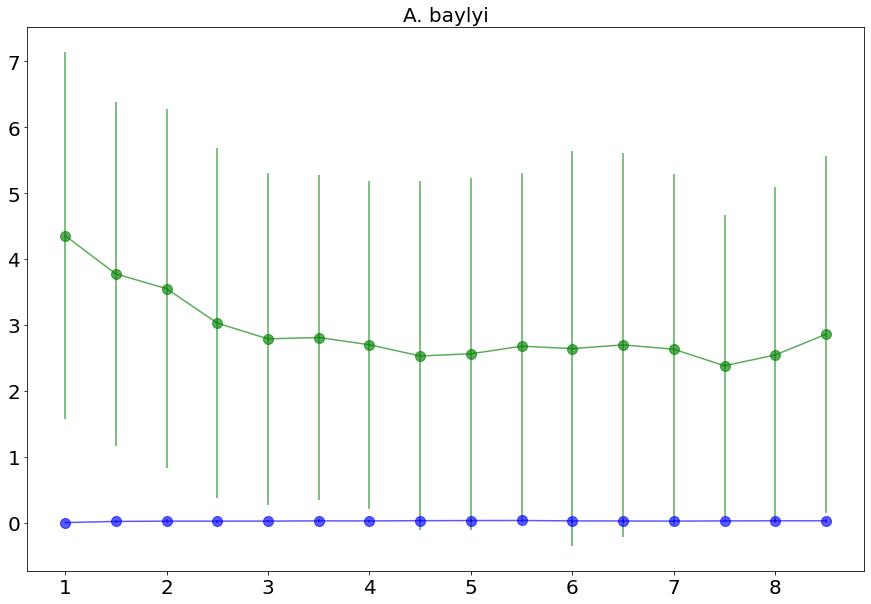

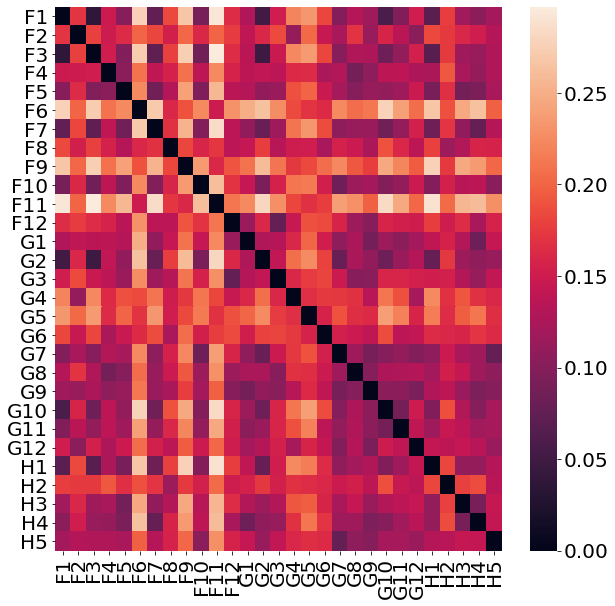

<Figure size 360x360 with 0 Axes>

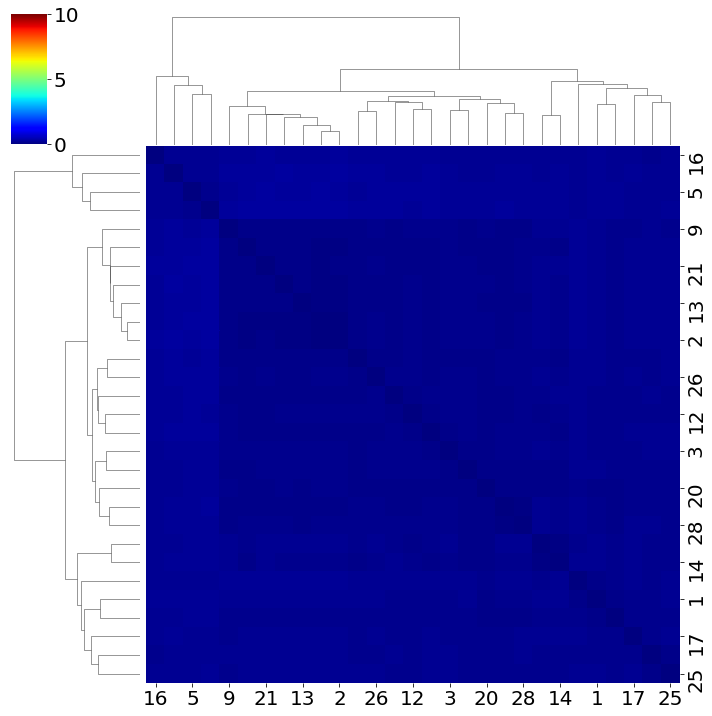

27


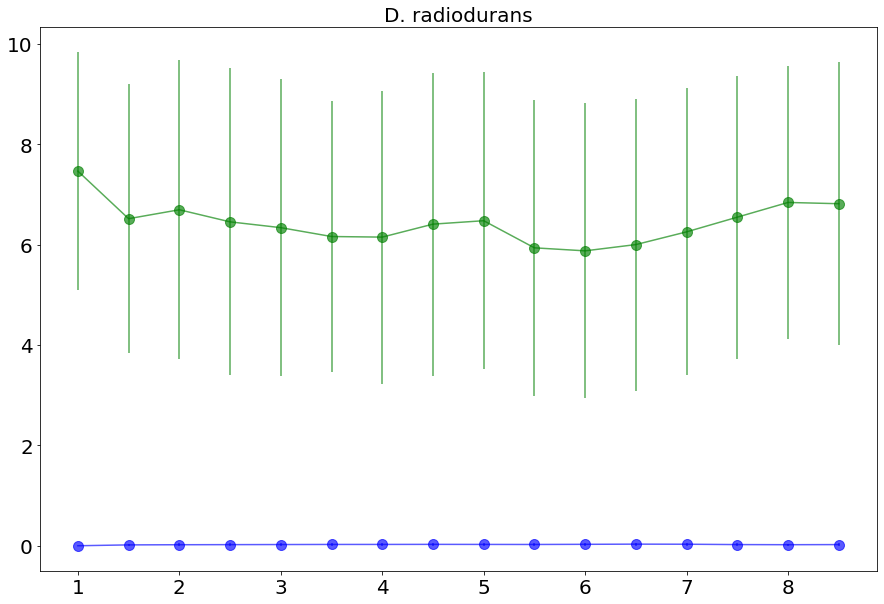

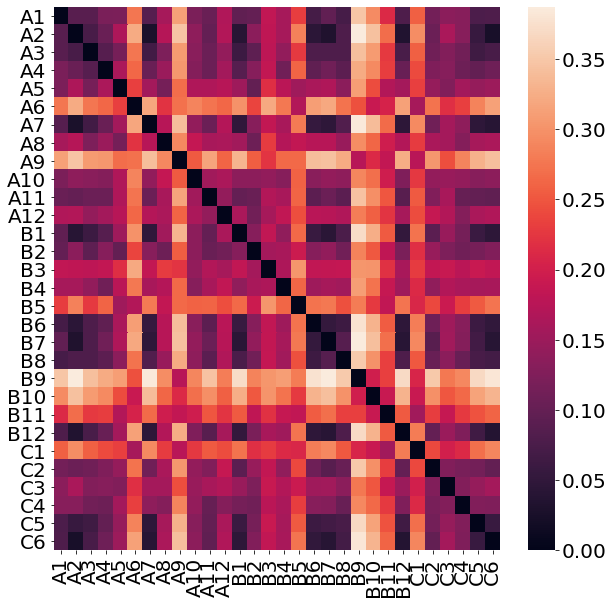

<Figure size 360x360 with 0 Axes>

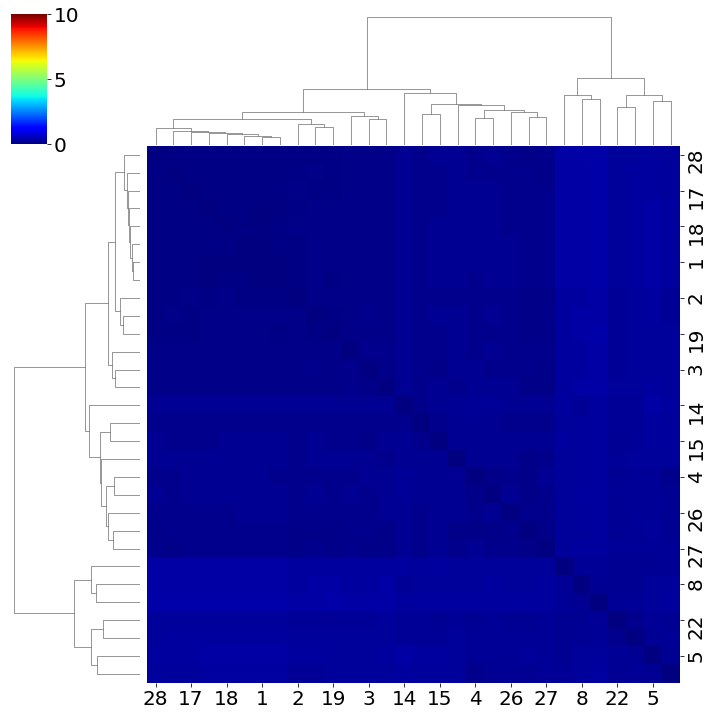

28


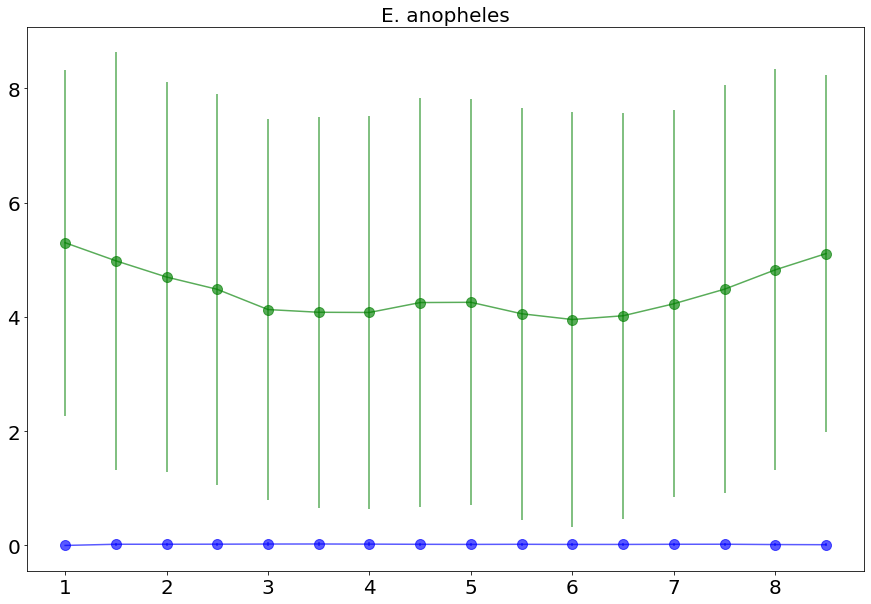

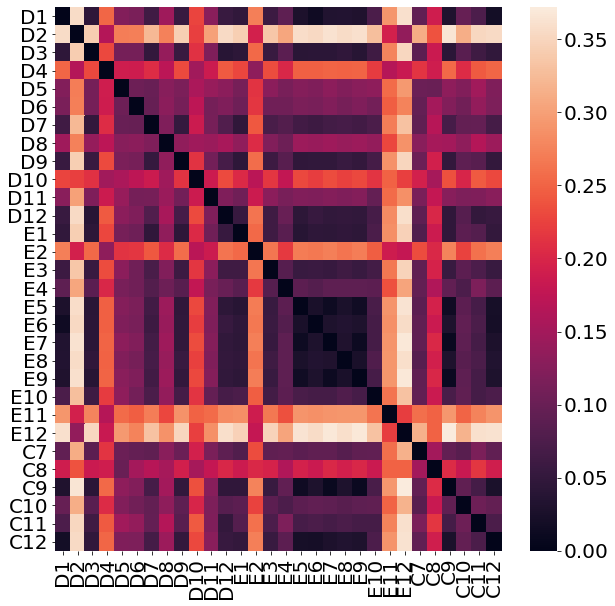

<Figure size 360x360 with 0 Axes>

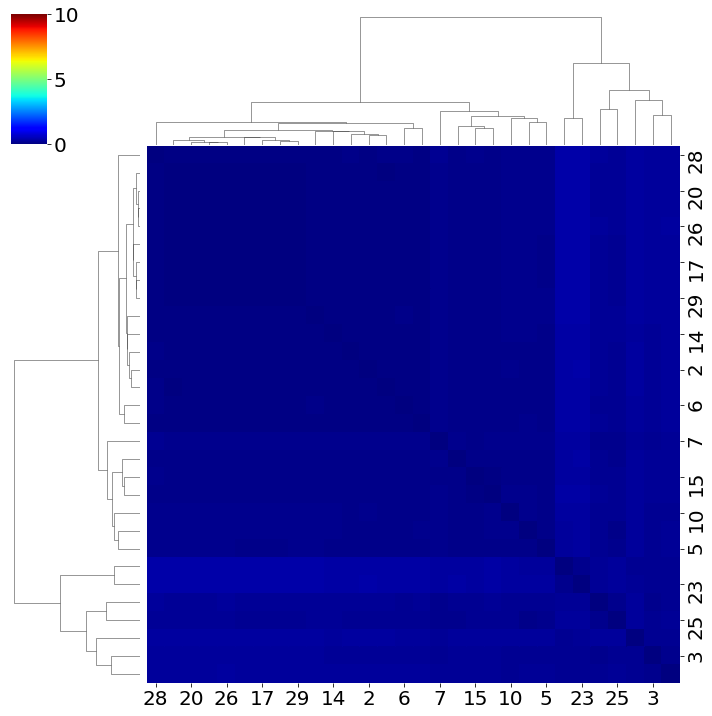

29


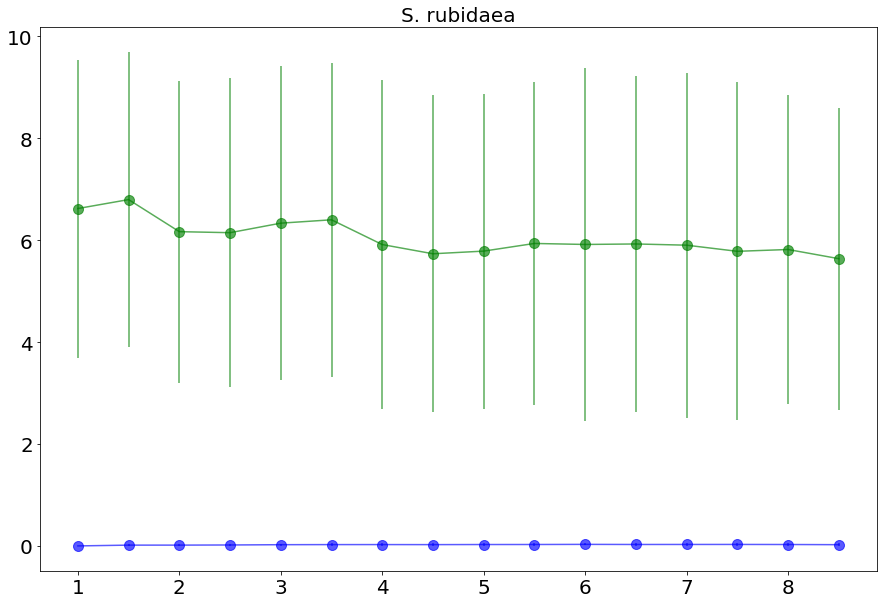

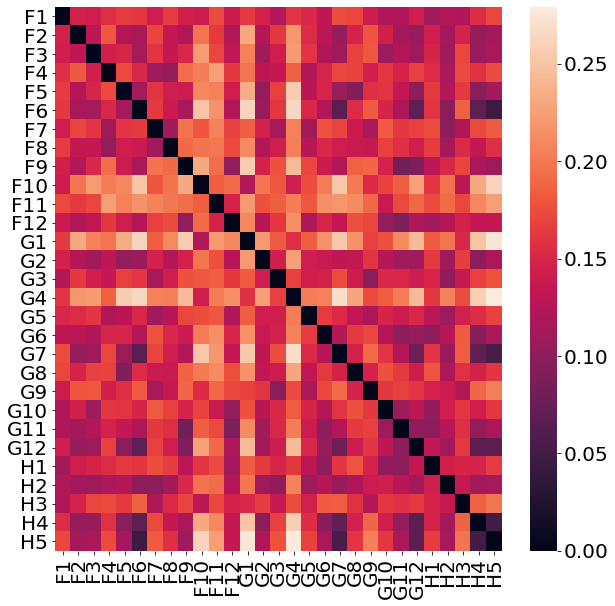

<Figure size 360x360 with 0 Axes>

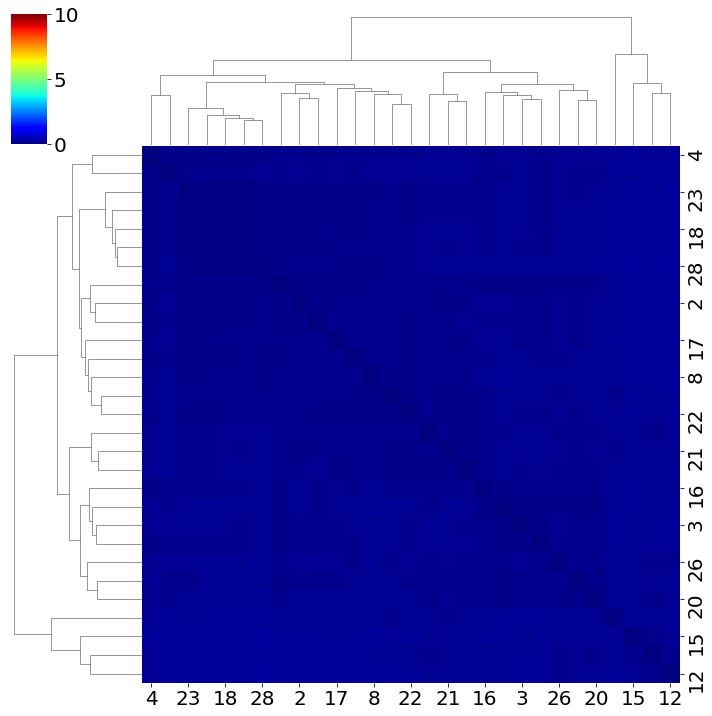

11


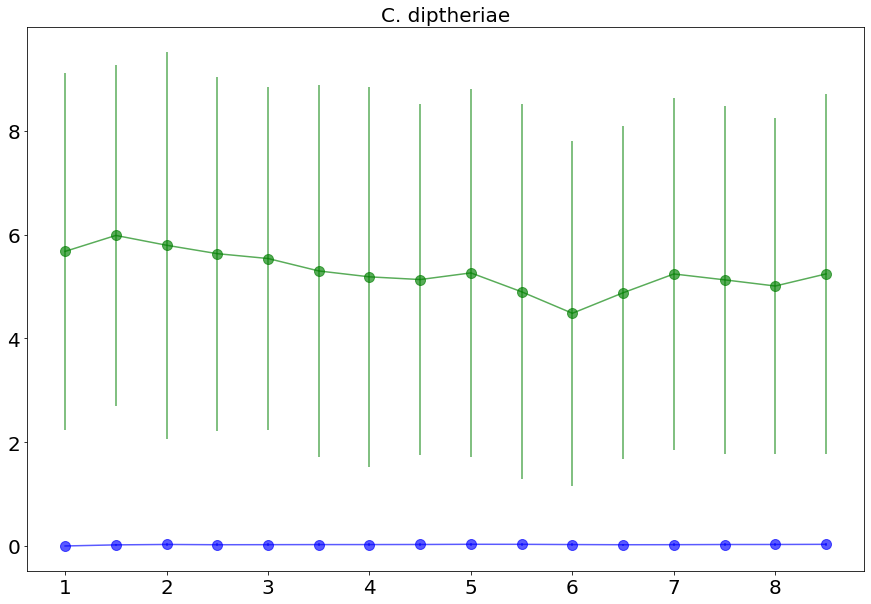

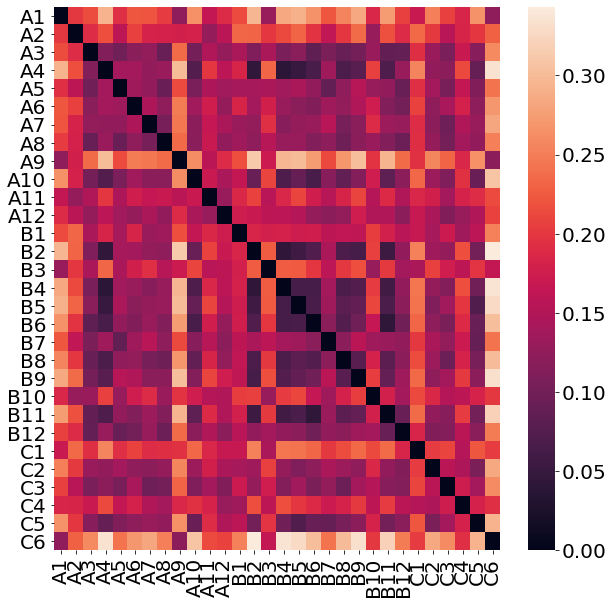

<Figure size 360x360 with 0 Axes>

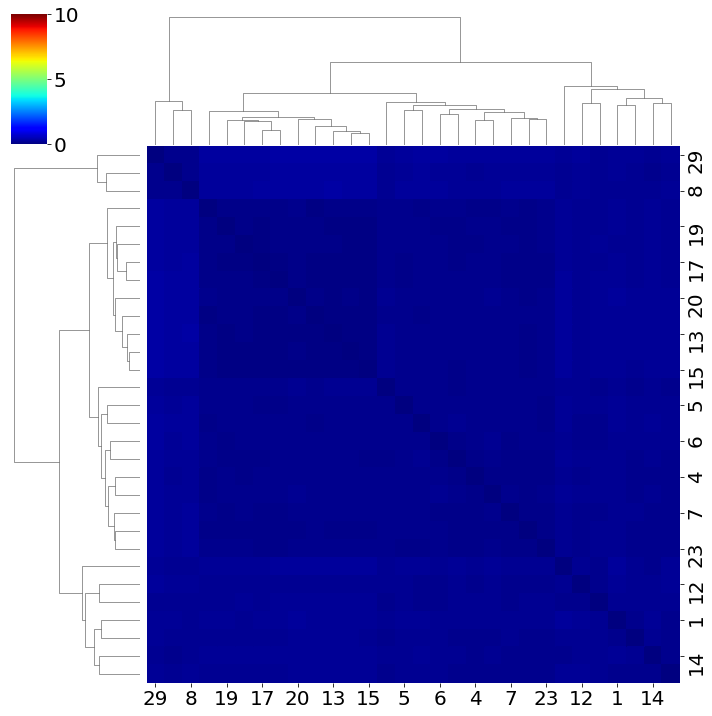

12


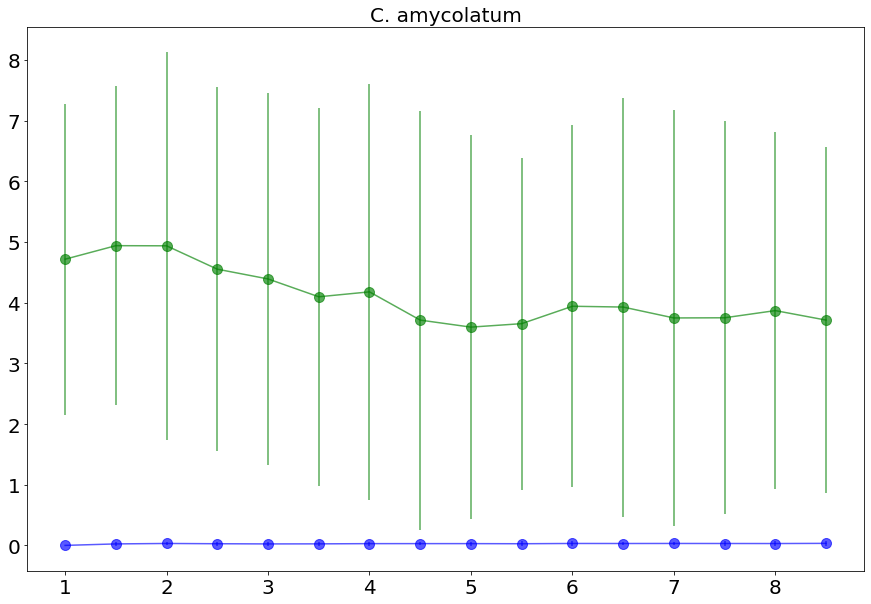

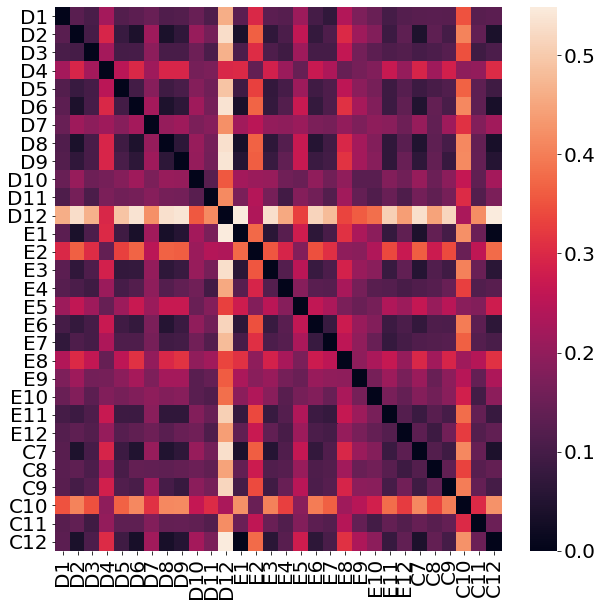

<Figure size 360x360 with 0 Axes>

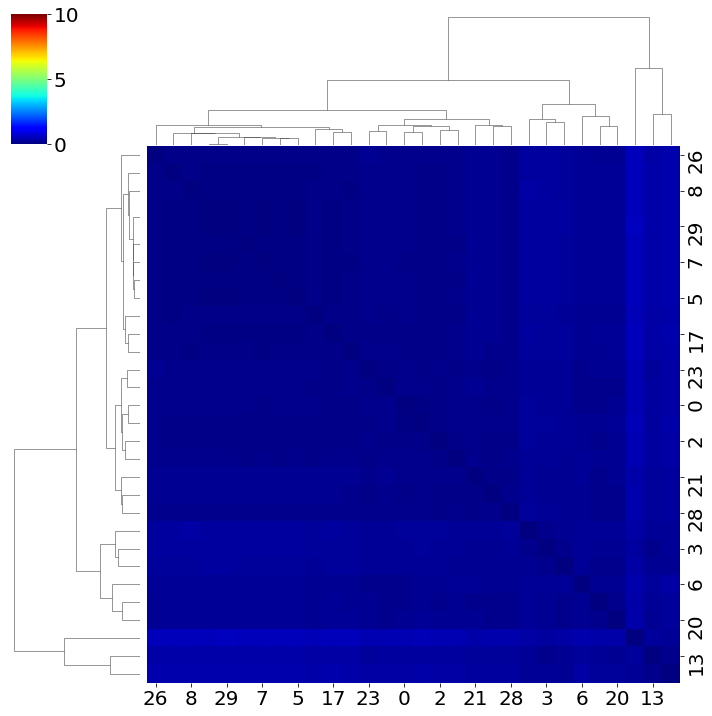

13


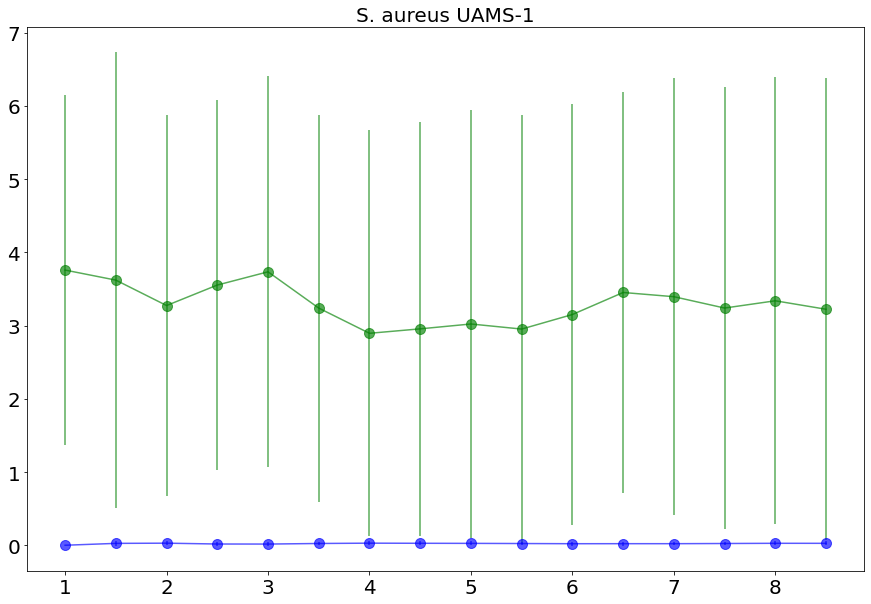

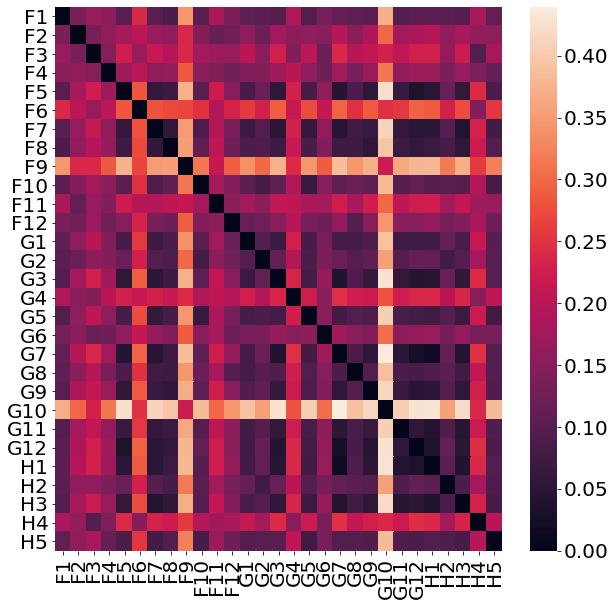

<Figure size 360x360 with 0 Axes>

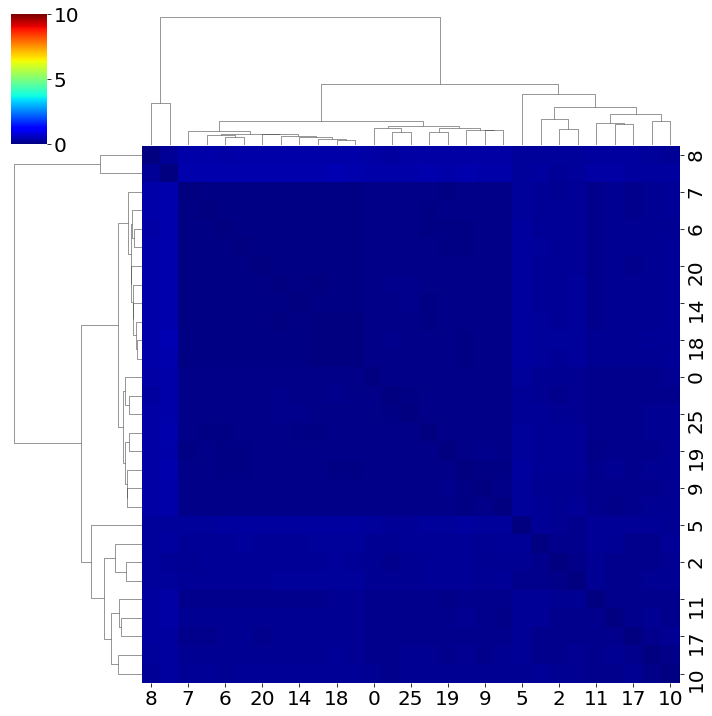

In [99]:
for filename in os.listdir(Pickle_Path):
    if '_HCT116.pickle' in filename and (not '210112' in filename): 
        output_file = open(Pickle_Path+'/'+filename,'rb'); 
        feature_dict = pickle.load(output_file);
        #print(feature_dict)

        StrainNumList = PSD['_'.join(filename.split('_')[0:2])]
        for StrainNumIndex in range(0,len(StrainNumList)):
            StrainNum = StrainNumList[StrainNumIndex];
            print(StrainNum)
            Num_to_Curve_Dict[StrainNum] = dict();
            
            if StrainNumIndex==0:
                all_row_ind = ['A','B']
                half_col_ind = ['1','2','3','4','5','6'];
                all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];
                all_indices = [];
                for full_index in ['A','B']:
                    for col_id in all_col_ind:
                        all_indices.append(full_index+col_id);
                for full_index in ['C']:
                    for col_id in half_col_ind:
                        all_indices.append(full_index+col_id);
            if StrainNumIndex==1: 
                all_row_ind = ['C','D','E']
                half_col_ind = ['7','8','9','10','11','12'];
                all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

                all_indices = [];
                for full_index in ['D','E']:
                    for col_id in all_col_ind:
                        all_indices.append(full_index+col_id);
                for full_index in ['C']:
                    for col_id in half_col_ind:
                        all_indices.append(full_index+col_id);
            if StrainNumIndex==2: 
                all_row_ind = ['F','G','H']
                half_col_ind = ['1','2','3','4','5',];
                all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

                all_indices = [];
                for full_index in ['F','G']:
                    for col_id in all_col_ind:
                        all_indices.append(full_index+col_id);
                for full_index in ['H']:
                    for col_id in half_col_ind:
                        all_indices.append(full_index+col_id);
                 

            all_traces = dict(); 
            for kernel_ind in [0,2]:
                all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
                for well_id_index in range(0,len(all_indices)):
                    this_well = all_indices[well_id_index];
                    time_keys = list(feature_dict[this_well].keys());
                    time_keys.sort()
                    #print(time_keys)
                    kernel =  kernel_names[kernel_ind];
                    if kernel_ind==2:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        if np.max(ys)>0:
                            ys = ys/np.max(ys);
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                    if kernel_ind==0:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        #if np.max(ys)>0:
                        #    ys = ys/np.max(ys);
                    if kernel_ind ==1:
                        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                        ys = ys/np.max(ys);
                        ys = [np.max([elem-ys[0],0]) for elem in ys]
                    try:
                        all_traces[kernel_ind][well_id_index,:] = np.asarray(savgol_filter(ys,7,5),dtype=np.float);
                    except:
                        print(well_id_index)            
            
            for kernel_ind in [0,2]:
                Num_to_Curve_Dict[StrainNum][kernel_ind] = np.mean(all_traces[kernel_ind],axis=0); 
            Num_to_Name_Dict[StrainNum]=StrainNameList[StrainNum];
            
            
            Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
            plt.figure(figsize=(15,10))
            for kernel_ind in [0,2]:
                ax = plt.errorbar(np.array(times[0:16]),np.mean(all_traces[kernel_ind],axis=0)[0:16],np.std(all_traces[kernel_ind],axis=0)[0:16],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
                for row_ind in range(0,len(all_indices)):
                    for col_ind in range(0,len(all_indices)):
                        Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            plt.title(StrainNameList[StrainNum],{'fontsize':20});
            #plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
            #plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
            
            plt.figure(figsize=(10,10))
            sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
            plt.figure(figsize=(5,5))
        
            sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0) 
            plt.show()
        

In [95]:
len(times)

23

In [78]:
Num_to_Curve_Dict

{1: {0: array([0.77661106, 0.7412259 , 0.72633762, 0.69799765, 0.72357682,
         0.73613604, 0.730402  , 0.68660188, 0.67848208, 0.67622735,
         0.68932303, 0.68037008, 0.69893495, 0.71115666, 0.72791392,
         0.74606214, 0.74296027, 0.71494949, 0.723787  , 0.74551482,
         0.74696658, 0.71780259, 0.81009968]),
  2: array([-0.00905483,  3.58766234,  3.39751082,  4.24776335,  5.30836941,
          6.35367965,  6.71183261,  6.2992785 ,  6.55555556,  7.01544012,
          7.11688312,  6.97647908,  7.38268398,  6.39307359,  5.11818182,
          4.6044733 ,  5.23506494,  5.597114  ,  5.72380952,  5.53982684,
          5.73679654,  6.21861472,  4.39134199])},
 2: {0: array([0.77578312, 0.7204994 , 0.64618223, 0.59886551, 0.57795379,
         0.54363364, 0.51780455, 0.50470715, 0.52441914, 0.50809828,
         0.50235191, 0.50993357, 0.51955218, 0.51928786, 0.51019119,
         0.52883121, 0.54397079, 0.5164573 , 0.4420442 , 0.47372013,
         0.56548383, 0.61222825, 0.6379

In [58]:
StrainNum


30

In [ ]:
import itertools



        
        
        


In [ ]:
File_Path = Pickle_Path+'20200611 A-549 P1 IV_V Pathogen NegCon #01-02.pickle';
import pickle
import numpy as np
import matplotlib.pyplot as plt 
output_file = open(File_Path,'rb')
feature_dict = pickle.load(output_file);
#feature_dict = pickle.load(output_file)
#kernel_names = ['hA549','hden','hmacro','uha549','uhden','uhmacro','bp']
#list_of_colors = ['g','b','c','r','m','y','b']
#
output_file.close()

In [3]:
kernel_names = ['hA549','uha549','bp'];
list_of_colors = ['g','r','b']

In [4]:
feature_dict

{'A1': {'02': {'hA549': 7, 'uha549': 8, 'bp': 0},
  '18': {'hA549': 4, 'uha549': 19, 'bp': 0},
  '16': {'hA549': 3, 'uha549': 13, 'bp': 0},
  '07': {'hA549': 6, 'uha549': 8, 'bp': 0},
  '20': {'hA549': 2, 'uha549': 14, 'bp': 0},
  '08': {'hA549': 7, 'uha549': 6, 'bp': 0},
  '13': {'hA549': 5, 'uha549': 7, 'bp': 0},
  '03': {'hA549': 6, 'uha549': 3, 'bp': 0},
  '15': {'hA549': 4, 'uha549': 11, 'bp': 0},
  '04': {'hA549': 7, 'uha549': 4, 'bp': 0},
  '17': {'hA549': 4, 'uha549': 18, 'bp': 0},
  '05': {'hA549': 6, 'uha549': 5, 'bp': 0},
  '23': {'hA549': 4, 'uha549': 12, 'bp': 0},
  '22': {'hA549': 3, 'uha549': 11, 'bp': 0},
  '21': {'hA549': 4, 'uha549': 13, 'bp': 0},
  '11': {'hA549': 6, 'uha549': 11, 'bp': 0},
  '24': {'hA549': 2, 'uha549': 12, 'bp': 0},
  '09': {'hA549': 7, 'uha549': 10, 'bp': 0},
  '12': {'hA549': 6, 'uha549': 8, 'bp': 0},
  '19': {'hA549': 5, 'uha549': 12, 'bp': 0},
  '14': {'hA549': 3, 'uha549': 14, 'bp': 0},
  '06': {'hA549': 5, 'uha549': 6, 'bp': 0},
  '10': {'hA5

In [5]:
num_range = np.arange(2,24,2);
time_keys = [];
for elem in num_range:
    if elem < 10:
        time_keys.append('0'+str(elem));
    else:
        time_keys.append(str(elem));

In [6]:
len(feature_dict['H12'].keys())

23

/Users/eyeung/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


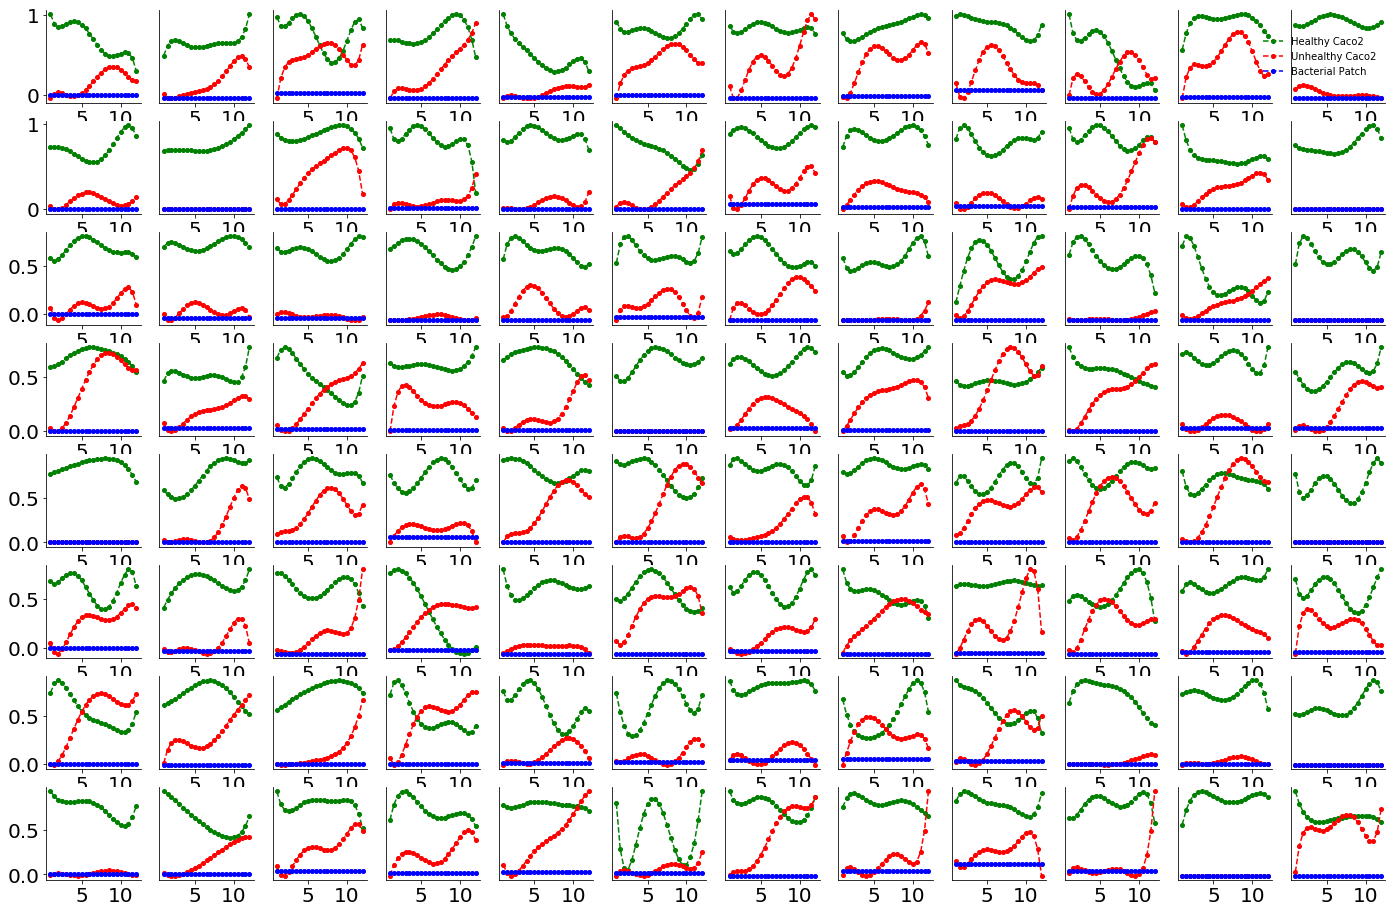

In [7]:

#time_keys = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19'];
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from scipy.signal import savgol_filter

#all_row_ind = ['G','H']
all_row_ind = ['A','B','C','D','E','F','G','H']
#all_row_ind = all_row_ind.reverse()
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']
#all_col_ind = ['9','10','11','12']
plt.figure(figsize=(24,16))
for row_ind in range(0,len(all_row_ind)):
    for col_ind in range(0,len(all_col_ind)):
        this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
        #this_well = 'A12'
        #time_keys = [ repr(elem) for elem in range(71,80)]
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        for kernel_ind in [0,1,2]:
            kernel =  kernel_names[kernel_ind];
            if kernel_ind==2:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = [np.max([elem-ys[0],0]) for elem in ys]
            if kernel_ind==0:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = ys/np.max(ys);
            if kernel_ind ==1:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = ys/np.max(ys);
                ys = [np.max([elem-ys[0],0]) for elem in ys]
            times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
            subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white',)
            ys = savgol_filter(ys, len(time_keys), 5) # window size 51, polynomial order 3
            subax.plot(times,ys,'.--',ms=8,color=list_of_colors[kernel_ind])
            #subax.xlabel('Time (Hrs)',size=20)
            #subax.ylabel('# of Clusters Estim.',size=20)
            #ax = plt.gca()
            #plt.ylim([0,1.0])
            #subax.set_yscale('log')
        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)   
        #if not (row_ind ==7):
        #subax.get_xaxis().set_ticks([repr(np.int(elem)*30.0/60.0) for elem in time_keys])
        if not (col_ind ==0):
            subax.get_yaxis().set_ticks([])
        if row_ind==0 and col_ind==11:
            plt.legend(['Healthy Caco2','Unhealthy Caco2','Bacterial Patch'],fontsize=10,frameon=False)
#        subax.set_facecolor('gray')
        



## Negative Control

In [8]:
feature_dict

{'A1': {'02': {'hA549': 7, 'uha549': 8, 'bp': 0},
  '18': {'hA549': 4, 'uha549': 19, 'bp': 0},
  '16': {'hA549': 3, 'uha549': 13, 'bp': 0},
  '07': {'hA549': 6, 'uha549': 8, 'bp': 0},
  '20': {'hA549': 2, 'uha549': 14, 'bp': 0},
  '08': {'hA549': 7, 'uha549': 6, 'bp': 0},
  '13': {'hA549': 5, 'uha549': 7, 'bp': 0},
  '03': {'hA549': 6, 'uha549': 3, 'bp': 0},
  '15': {'hA549': 4, 'uha549': 11, 'bp': 0},
  '04': {'hA549': 7, 'uha549': 4, 'bp': 0},
  '17': {'hA549': 4, 'uha549': 18, 'bp': 0},
  '05': {'hA549': 6, 'uha549': 5, 'bp': 0},
  '23': {'hA549': 4, 'uha549': 12, 'bp': 0},
  '22': {'hA549': 3, 'uha549': 11, 'bp': 0},
  '21': {'hA549': 4, 'uha549': 13, 'bp': 0},
  '11': {'hA549': 6, 'uha549': 11, 'bp': 0},
  '24': {'hA549': 2, 'uha549': 12, 'bp': 0},
  '09': {'hA549': 7, 'uha549': 10, 'bp': 0},
  '12': {'hA549': 6, 'uha549': 8, 'bp': 0},
  '19': {'hA549': 5, 'uha549': 12, 'bp': 0},
  '14': {'hA549': 3, 'uha549': 14, 'bp': 0},
  '06': {'hA549': 5, 'uha549': 6, 'bp': 0},
  '10': {'hA5

In [9]:
import itertools
all_row_ind = ['A','B']
half_col_ind = ['1','2','3','4','5','6'];
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

all_indices = [];
for full_index in ['A','B']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);
for full_index in ['C']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);

        
all_traces = dict(); 
for kernel_ind in [0,1,2]:
    all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
    for well_id_index in range(0,len(all_indices)):
        this_well = all_indices[well_id_index];
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        #print(time_keys)
        kernel =  kernel_names[kernel_ind];
        if kernel_ind==2:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        if kernel_ind==0:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys);
        if kernel_ind ==1:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys);
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        try:
            all_traces[kernel_ind][well_id_index,:] = np.asarray(savgol_filter(ys,7,5),dtype=np.float);
        except:
            print(well_id_index)
        

In [10]:
# Save Traces
Num_to_Curve_Dict[0] = dict();
for kernel_ind in [0,1]:
    Num_to_Curve_Dict[0][kernel_ind] = np.mean(all_traces[kernel_ind],axis=0); 
Num_to_Name_Dict[0]='Negative Control';

/Users/eyeung/Library/Python/3.7/lib/python/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


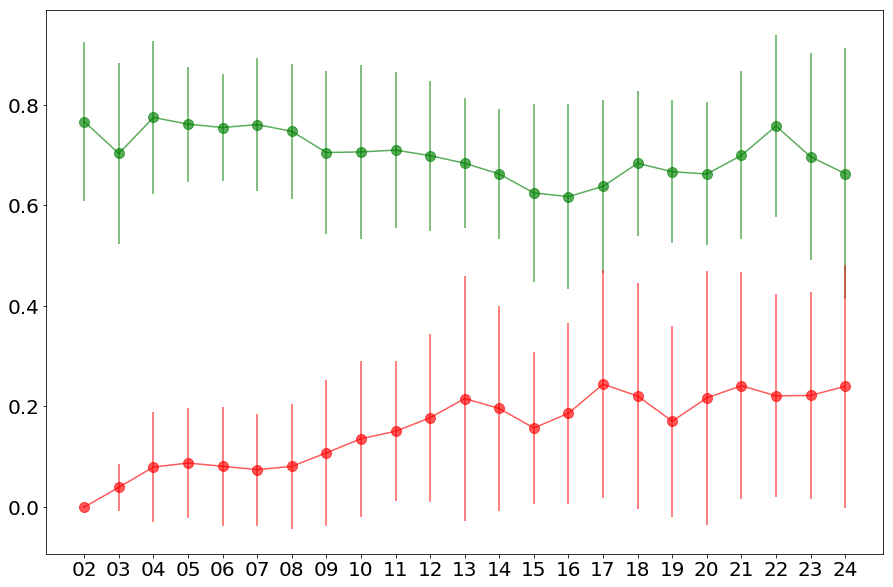

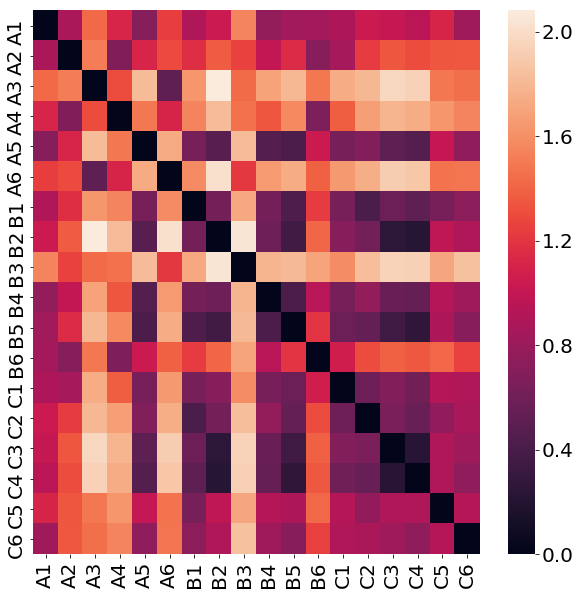

<Figure size 360x360 with 0 Axes>

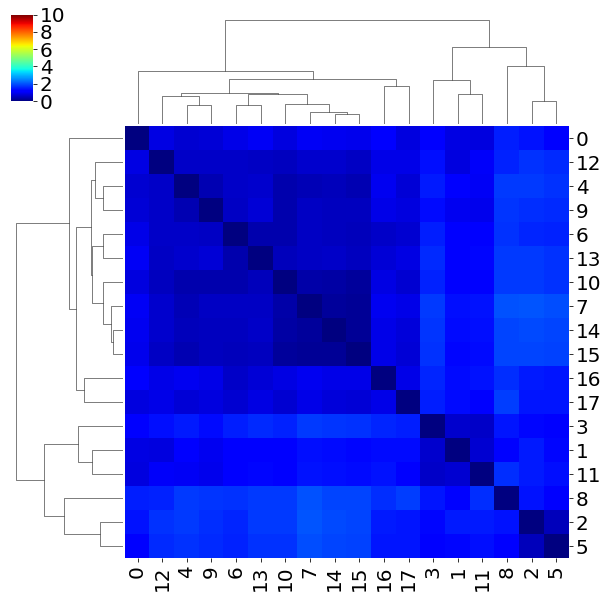

In [11]:
times = time_keys
Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
plt.figure(figsize=(15,10))

for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:]),np.mean(all_traces[kernel_ind],axis=0)[0:],np.std(all_traces[kernel_ind],axis=0)[0:],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)

for kernel_ind in [1]:
    for row_ind in range(0,len(all_indices)):
        for col_ind in range(0,len(all_indices)):
                Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            
#plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
#plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
import seaborn as sns;
plt.figure(figsize=(10,10))
sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
plt.figure(figsize=(5,5))

sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0)



## S. epidermis

In [12]:
(all_traces[1])

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.27842333e-03, -1.25313283e-02,
         3.07587150e-02,  5.62770563e-02,  1.15288221e-01,
         9.97949419e-02,  9.11369332e-03,  6.83526999e-02,
         2.10982000e-01,  2.21690590e-01,  2.59740260e-01,
         5.37707906e-01,  5.01480975e-01,  3.16473001e-01,
         2.53132832e-01,  2.65436318e-01,  1.56185919e-01,
         2.11209843e-01,  2.10412395e-01],
       [-1.90985485e-03,  1.14591291e-02,  8.89992361e-02,
         3.81970970e-02, -1.52788388e-02,  2.54647313e-03,
         1.90985485e-03, -7.00280112e-03,  9.54927426e-03,
         7.48663102e-02,  2.38986504e-01,  3.02648332e-01,
         2.14667685e-01,  7.16832187e-02,  5.56404380e-02,
         2.12121212e-01,  3.81970970e-01,  4.61420932e-01,
         4.70078941e-01,  5.52966641e-01,  5.70569137e-01,
         5.07066463e-01,  3.81175197e-01],
       [-1.20957474e-03,  7.25744843e-03,  3.64209320e-01,
         4.06544436e-01,  3.2

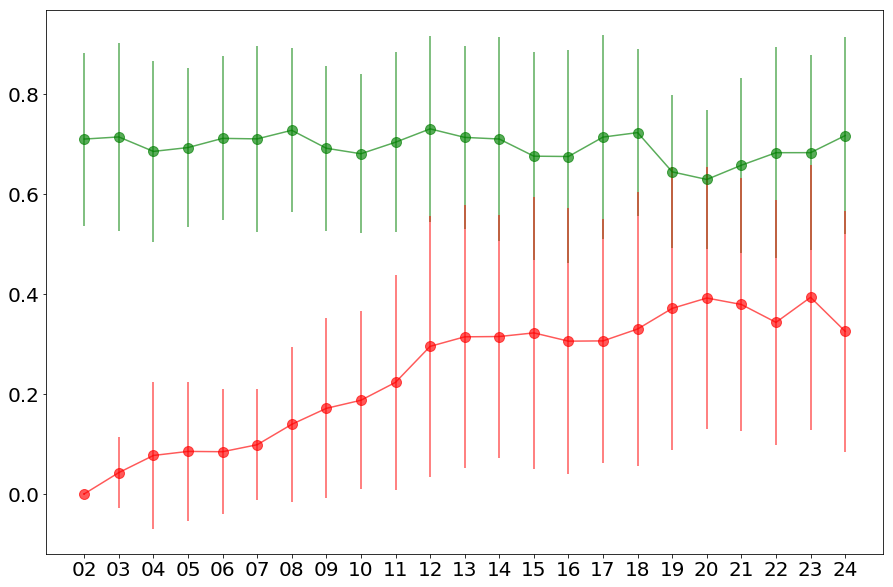

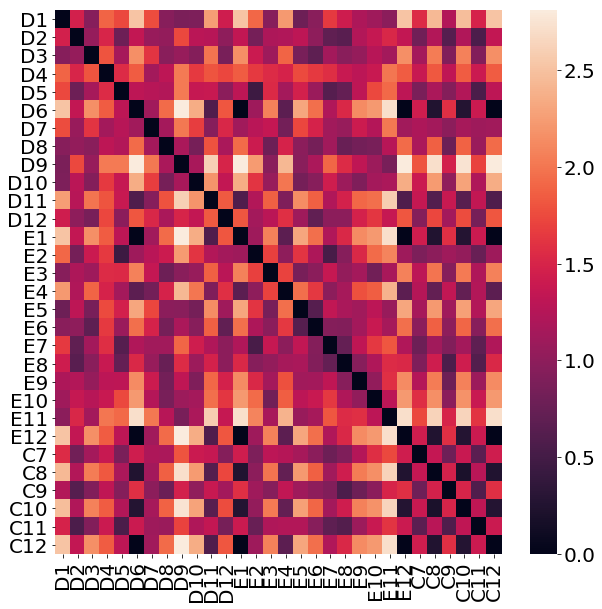

<Figure size 360x360 with 0 Axes>

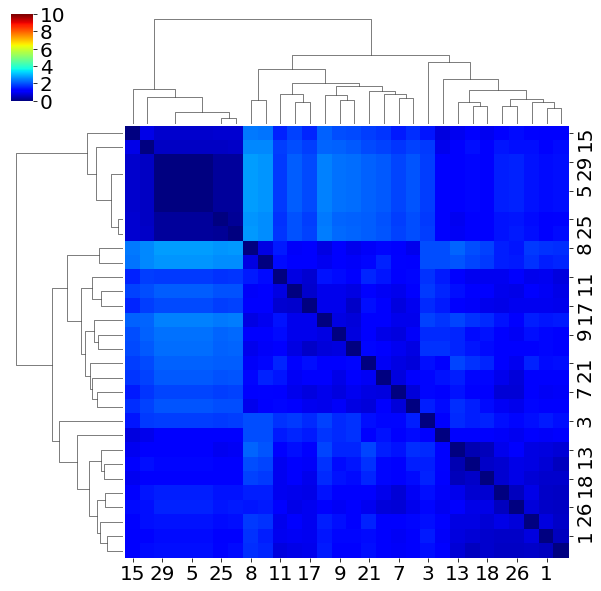

In [13]:
import itertools
all_row_ind = ['C','D','E']
half_col_ind = ['7','8','9','10','11','12'];
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

all_indices = [];
for full_index in ['D','E']:
    for col_id in all_col_ind:
        all_indices.append(full_index+col_id);
for full_index in ['C']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);

        
all_traces = dict(); 
for kernel_ind in [0,1,2]:
    all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
    for well_id_index in range(0,len(all_indices)):
        this_well = all_indices[well_id_index];
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        #print(time_keys)
        kernel =  kernel_names[kernel_ind];
        if kernel_ind==2:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        if kernel_ind==0:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys);
        if kernel_ind ==1:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys);
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        try:
            all_traces[kernel_ind][well_id_index,:] = np.asarray(savgol_filter(ys,7,5),dtype=np.float);
        except:
            print(well_id_index)
        

Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
plt.figure(figsize=(15,10))
for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:25]),np.mean(all_traces[kernel_ind],axis=0)[0:25],np.std(all_traces[kernel_ind],axis=0)[0:25],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
    for row_ind in range(0,len(all_indices)):
        for col_ind in range(0,len(all_indices)):
            Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            
#plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
#plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
import seaborn as sns;
plt.figure(figsize=(10,10))
sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
plt.figure(figsize=(5,5))

sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0) 

In [14]:
Num_to_Curve_Dict[1] = dict();
for kernel_ind in [0,1]:
    Num_to_Curve_Dict[1][kernel_ind] = np.mean(all_traces[kernel_ind],axis=0); 
Num_to_Name_Dict[1]='S. epidermis';

## E. faecalis

In [15]:
feature_dict['H5']

{'19': {'hA549': 3, 'uha549': 7, 'bp': 0},
 '02': {'hA549': 3, 'uha549': 1, 'bp': 0},
 '21': {'hA549': 6, 'uha549': 7, 'bp': 0},
 '13': {'hA549': 5, 'uha549': 7, 'bp': 0},
 '23': {'hA549': 5, 'uha549': 8, 'bp': 0},
 '05': {'hA549': 4, 'uha549': 0, 'bp': 0},
 '04': {'hA549': 5, 'uha549': 0, 'bp': 0},
 '15': {'hA549': 3, 'uha549': 2, 'bp': 0},
 '17': {'hA549': 4, 'uha549': 6, 'bp': 0},
 '11': {'hA549': 4, 'uha549': 4, 'bp': 0},
 '24': {'hA549': 3, 'uha549': 9, 'bp': 0},
 '10': {'hA549': 5, 'uha549': 3, 'bp': 0},
 '14': {'hA549': 4, 'uha549': 4, 'bp': 0},
 '18': {'hA549': 4, 'uha549': 7, 'bp': 0},
 '07': {'hA549': 3, 'uha549': 0, 'bp': 0},
 '06': {'hA549': 3, 'uha549': 0, 'bp': 0},
 '08': {'hA549': 4, 'uha549': 0, 'bp': 0},
 '22': {'hA549': 3, 'uha549': 10, 'bp': 0},
 '20': {'hA549': 3, 'uha549': 5, 'bp': 0},
 '12': {'hA549': 5, 'uha549': 4, 'bp': 0},
 '03': {'hA549': 5, 'uha549': 2, 'bp': 0},
 '16': {'hA549': 5, 'uha549': 4, 'bp': 0},
 '09': {'hA549': 4, 'uha549': 3, 'bp': 0}}

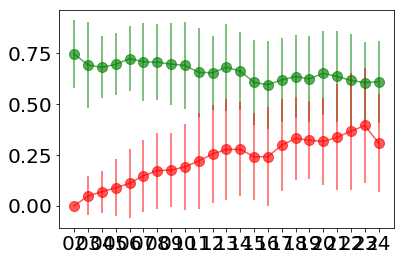

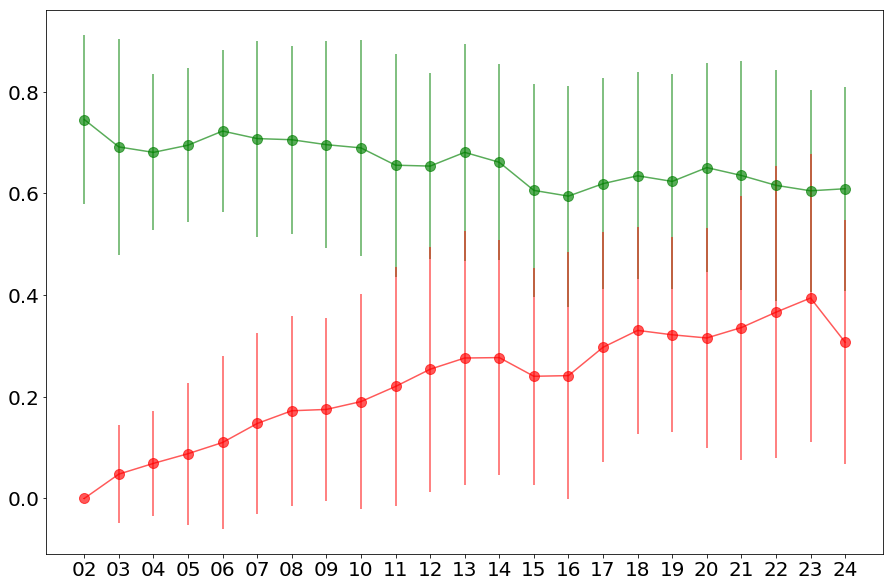

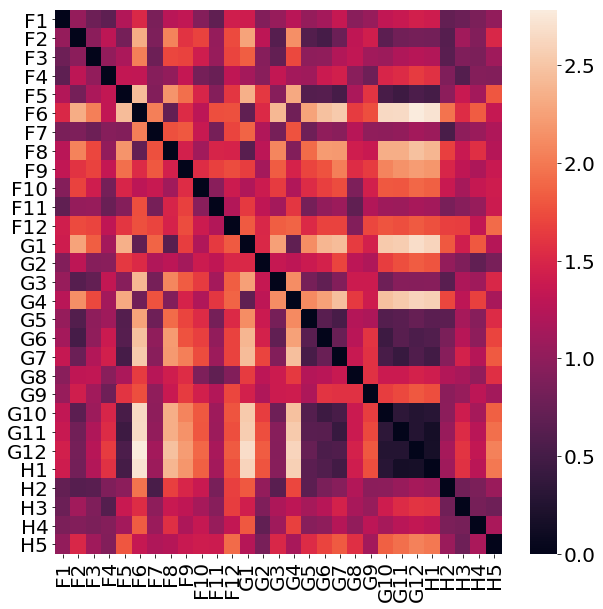

<Figure size 720x720 with 0 Axes>

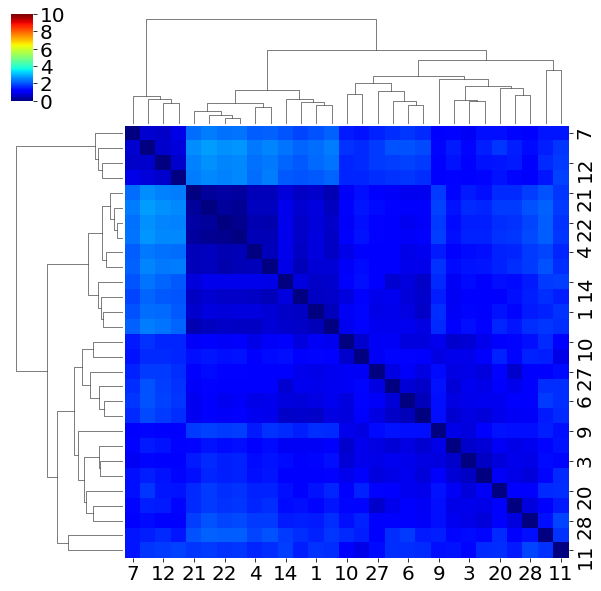

In [16]:
import itertools
all_row_ind = ['F','G','H']
half_col_ind = ['1','2','3','4','5',];
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12'];

all_indices = [];
for full_index in ['F','G']:
    for col_id in all_col_ind:
        all_indices.append(full_index+col_id);
for full_index in ['H']:
    for col_id in half_col_ind:
        all_indices.append(full_index+col_id);

        
all_traces = dict(); 
for kernel_ind in [0,1,2]:
    all_traces[kernel_ind] = np.zeros( (len(all_indices),len(feature_dict['A1'].keys()) ))
    for well_id_index in range(0,len(all_indices)):
        this_well = all_indices[well_id_index];
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        #print(time_keys)
        kernel =  kernel_names[kernel_ind];
        if kernel_ind==2:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        if kernel_ind==0:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys);
        if kernel_ind ==1:
            ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            ys = ys/np.max(ys);
            ys = [np.max([elem-ys[0],0]) for elem in ys]
        try:
            all_traces[kernel_ind][well_id_index,:] = np.asarray(savgol_filter(ys,7,5),dtype=np.float);
        except:
            print(well_id_index)
        
for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:24]),np.mean(all_traces[kernel_ind],axis=0)[0:24],np.std(all_traces[kernel_ind],axis=0)[0:24],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
    
Error_Matrix = np.zeros((len(all_indices),len(all_indices)));
plt.figure(figsize=(15,10))

for kernel_ind in [0,1]:
    ax = plt.errorbar(np.array(times[0:24]),np.mean(all_traces[kernel_ind],axis=0)[0:24],np.std(all_traces[kernel_ind],axis=0)[0:24],marker='.',markersize=20,color=list_of_colors[kernel_ind],alpha=.65)
    for row_ind in range(0,len(all_indices)):
        for col_ind in range(0,len(all_indices)):
            Error_Matrix[row_ind,col_ind] = np.linalg.norm(all_traces[kernel_ind][row_ind,:]-all_traces[kernel_ind][col_ind,:],ord=2);
            
#plt.plot(times[0:24],np.mean(all_traces[1],axis=0)[0:24],,markersize=20)
#plt.plot(times[0:24],np.mean(all_traces[2],axis=0)[0:24],'b.',markersize=20)
import seaborn as sns;
plt.figure(figsize=(10,10))
sns.heatmap(Error_Matrix,xticklabels=all_indices,yticklabels=all_indices)
plt.figure(figsize=(10,10))

sns.clustermap(Error_Matrix,cmap='jet',vmin=0.0,vmax=10.0)    
    

In [17]:
# Save Traces
Num_to_Curve_Dict[2] = dict();
for kernel_ind in [0,1]:
    Num_to_Curve_Dict[2][kernel_ind] = np.mean(all_traces[kernel_ind],axis=0); 
Num_to_Name_Dict[2]='E. faecalis';
StandardCurve_File = open('/Users/eyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/All_Standard_Curves.pickle','wb');
All_Dicts = [Num_to_Curve_Dict,Num_to_Name_Dict]; 
pickle.dump(All_Dicts,StandardCurve_File);
StandardCurve_File.close(); 